In [3]:
import os
import time
#  
import numpy as np
import random
from milvus import Milvus,MetricType, IndexType
SERVER_ADDR = '127.0.0.1'
SERVER_PORT = '19530'

In [4]:
client = Milvus(host=SERVER_ADDR, port=SERVER_PORT)
# create_milvus_collection(milvus)

In [6]:
#  ➜ sudo docker run -d --name milvus_cpu_1.1.0 \
# -p 19530:19530 \
# -p 19121:19121 \
# -v /home/$USER/milvus/db:/var/lib/milvus/db \
# -v /home/$USER/milvus/conf:/var/lib/milvus/conf \
# -v /home/$USER/milvus/logs:/var/lib/milvus/logs \
# -v /home/$USER/milvus/wal:/var/lib/milvus/wal \
# milvusdb/milvus:1.1.0-cpu-d050721-5e559c

In [5]:
client.list_collections()

(Status(code=0, message='Show collections successfully!'),
 ['demo_film_tutorial', 'siftsmall', 'sift'])

In [7]:
collection_name = 'demo_film_tutorial'
collection_param = {
    "collection_name": collection_name,
    "dimension": 8,
    "index_file_size": 2048,
    "metric_type": MetricType.L2
}
client.create_collection(collection_param)

Status(code=0, message='Create collection successfully!')

In [7]:
client.list_collections()

(Status(code=0, message='Show collections successfully!'),
 ['demo_film_tutorial', 'siftsmall'])

In [ ]:
client.list_partitions(collection_name)

In [ ]:
client.create_partition(collection_name, "films")

In [ ]:
import random

In [ ]:
film_A = [random.random() for _ in range(8)]

In [ ]:
film_A

In [ ]:
entity_ids = [0, 1, 2]
entities = [[random.random() for _ in range(8)] for _ in range(3)]
status, ids = client.insert(collection_name, entities, entity_ids)

In [ ]:
status, results = client.search(collection_name, 2, [film_A])

In [ ]:
results

In [ ]:
ids

In [ ]:
client.create_index(collection_name, IndexType.FLAT)

In [ ]:
query_vectors = film_A

In [ ]:
query_vectors = [[1,2,3,4,5,6,7,8]]

In [ ]:
# FLAT
client.search(collection_name,1,query_vectors)

In [ ]:
status, info = client.get_collection_info(collection_name)

In [ ]:
info

In [ ]:
status, results = client.search(collection_name, 2, [film_A])

In [ ]:
status

In [ ]:
results

In [8]:
from bohb import *

In [9]:
from bohb import BOHB
import bohb.configspace as cs


def objective(step, alpha, beta):
    return 1 / (alpha * step + 0.1) + beta


def evaluate(params, n_iterations):
    loss = 0.0
    for i in range(int(n_iterations)):
        loss += objective(**params, step=i)
    return loss/n_iterations


alpha = cs.CategoricalHyperparameter('alpha', [0.001, 0.01, 0.1])
beta = cs.CategoricalHyperparameter('beta', [1, 2, 3])
configspace = cs.ConfigurationSpace([alpha, beta], seed=123)

opt = BOHB(configspace, evaluate, max_budget=10, min_budget=1)
logs = opt.optimize()
print(logs)


s_max: 3
s: 0
Budget: 10
Loss: 10.187714031754279
Configuration:
   Name: alpha | Value: 0.01
   Name: beta  | Value: 3

s: 1
Budget: 3.333333333333333
Loss: 7.111111111111111
Configuration:
   Name: alpha | Value: 0.1
   Name: beta  | Value: 1

Budget: 10.0
Loss: 3.9289682539682547
Configuration:
   Name: alpha | Value: 0.1
   Name: beta  | Value: 1

s: 2
Budget: 1.1111111111111112
Loss: 11.0
Configuration:
   Name: alpha | Value: 0.01
   Name: beta  | Value: 1

Budget: 3.3333333333333335
Loss: 7.111111111111111
Configuration:
   Name: alpha | Value: 0.1
   Name: beta  | Value: 1

Budget: 10.0
Loss: 3.9289682539682547
Configuration:
   Name: alpha | Value: 0.1
   Name: beta  | Value: 1

Best Hyperparameter Configuration:
Budget: 10.0
Loss: 3.9289682539682547
Configuration:
   Name: alpha | Value: 0.1
   Name: beta  | Value: 1



In [12]:
!pwd

/home/xiangpan/Labs/HOBO


In [91]:
import numpy as np
fv = numpy.fromfile("./cached_datasets/siftsmall/siftsmall_base.fvecs", dtype="int32")
dim = fv.view(numpy.int32)[0]
new = fv.reshape(-1, dim + 1)[:,1:] # reshapes file
f_new = new.view(numpy.float32)
np.save("./cached_datasets/siftsmall_numpy/siftsmall_base",f_new)

In [93]:
f_new

array([[ 0., 16., 35., ..., 25., 23.,  1.],
       [14., 35., 19., ..., 11., 21., 33.],
       [ 0.,  1.,  5., ...,  4., 23., 10.],
       ...,
       [48.,  1.,  0., ..., 22., 62., 18.],
       [ 0.,  0.,  0., ...,  3.,  3., 11.],
       [14.,  2.,  0., ...,  0.,  0.,  7.]], dtype=float32)

In [70]:
import numpy as np
fv = numpy.fromfile("./cached_datasets/siftsmall/siftsmall_groundtruth.ivecs", dtype="int32")
# dim = fv.view(numpy.int32)[0]
dim = 100
f_new = fv.reshape(-1, dim + 1)[:,1:] # reshapes file
# f_new = new.view(numpy.float32)
np.save("./cached_datasets/siftsmall_numpy/siftsmall_groundtruth",f_new)

In [60]:
fv = numpy.fromfile("./cached_datasets/siftsmall/siftsmall_groundtruth.ivecs", dtype="int32")

In [71]:
new

array([[2176, 3752,  882, ...,  348, 3043, 3687],
       [2781, 9574, 2492, ..., 3849, 2905, 4102],
       [2707, 9938, 2698, ..., 1251, 8564, 8173],
       ...,
       [8825, 9081, 6142, ..., 8178, 5887, 4565],
       [5460, 5439, 5810, ..., 5199, 7483, 5232],
       [8082, 8782, 4767, ...,   11, 2482, 3631]], dtype=int32)

In [29]:
import numpy as np
fv = numpy.fromfile("./cached_datasets/siftsmall/siftsmall_learn.fvecs", dtype="int32")
dim = fv.view(numpy.int32)[0]
new = fv.reshape(-1, dim + 1)[:,1:] # reshapes file
f_new = new.view(numpy.float32)
np.save("./cached_datasets/siftsmall_numpy/siftsmall_learn",f_new)

In [94]:
import numpy as np
fv = numpy.fromfile("./cached_datasets/siftsmall/siftsmall_query.fvecs", dtype="int32")
dim = fv.view(numpy.int32)[0]
new = fv.reshape(-1, dim + 1)[:,1:] # reshapes file
f_new = new.view(numpy.float32)
np.save("./cached_datasets/siftsmall_numpy/siftsmall_query",f_new)

In [96]:
f_new

array([[ 1.,  3., 11., ..., 42., 48., 11.],
       [40., 25., 11., ...,  3., 19., 13.],
       [28.,  4.,  3., ...,  2., 54., 47.],
       ...,
       [14.,  8.,  0., ..., 32., 14., 15.],
       [11., 48., 10., ...,  0.,  0.,  0.],
       [ 4., 10.,  5., ..., 43.,  0.,  8.]], dtype=float32)

In [72]:
docker

NameError: name 'docker' is not defined

# Connection

In [64]:
import os
import time
#  
import numpy as np
import random
from milvus import Milvus,MetricType, IndexType
SERVER_ADDR = '127.0.0.1'
SERVER_PORT = '19530'

host = '127.0.0.1'
port = '19530'
client = Milvus(host, port)

In [65]:
collection_name = 'siftsmall'
collection_param = {
    "collection_name": collection_name,
    "dimension": 128,
#     "index_file_size": 2048,
    "metric_type": MetricType.L2
}
client.create_collection(collection_param)

Status(code=0, message='Create collection successfully!')

In [66]:
client.list_collections()

(Status(code=0, message='Show collections successfully!'),
 ['demo_film_tutorial', 'siftsmall'])

# insert base into db

In [67]:
siftsmall_base = np.load("./cached_datasets/siftsmall_numpy/siftsmall_base.npy")

In [68]:
siftsmall_base.shape

(10000, 128)

In [69]:
entity_ids = [i for i in range(len(siftsmall_base))]
entities = siftsmall_base
collection_name = "siftsmall"

In [70]:
status, ids = client.insert(collection_name, entities, entity_ids)

# index build

In [19]:
client.create_index(collection_name, IndexType.IVF_FLAT, {"nlist": 100})
# int. 1~65536

Status(code=0, message='Build index successfully!')

# search query

## get_query 

In [26]:
siftsmall_query = np.load("./cached_datasets/siftsmall_numpy/siftsmall_query.npy")
query_vectors = siftsmall_query

In [27]:
collection_name = 'siftsmall'
statue, res = client.search(collection_name, top_k = 200, query_records = query_vectors, params={"nprobe": 1 })
# int. 1~nlist(cpu), 1~min[2048, nlist](gpu)

In [15]:
res

[
 [ (id:2176, distance:76608.0),
   (id:3752, distance:77004.0),
   (id:882, distance:79702.0),
   ...
   (id:479, distance:138081.0) ]

 [ (id:3136, distance:70189.0),
   (id:1038, distance:72748.0),
   (id:3998, distance:76825.0),
   ...
   (id:3289, distance:135931.0) ]

 [ (id:2707, distance:42740.0),
   (id:6801, distance:59501.0),
   (id:5171, distance:71136.0),
   ...
   (id:6909, distance:159583.0) ]

        ......
            ......
]

## result_convert

In [267]:
converted_res = np.zeros(res.shape)
or i in range(len(res)):
    for j in range(len(res[i])):
#         print(i,j,res[i][j].id)
        converted_res[i][j] = res[i][j].id

## get_groundtruth

In [34]:
siftsmall_groundtruth = np.load("./cached_datasets/siftsmall_numpy/siftsmall_groundtruth.npy")
siftsmall_groundtruth.shape
# query_vectors = siftsmall_query

(100, 100)

In [35]:
converted_res.shape

NameError: name 'converted_res' is not defined

# recall

In [254]:
from torchmetrics import RetrievalRecall
# import torch.tensor as tensor
indexes = torch.tensor([0, 0, 0, 1, 1, 1, 1])
preds = torch.tensor([0.2, 0.3, 0.5, 0.1, 0.3, 0.5, 0.2])
target = torch.tensor([False, False, True, False, True, False, True])
r2 = RetrievalRecall(k=100)
r2(preds, target, indexes=indexes)


tensor(1.)

In [270]:
preds = converted_res

In [271]:
target = siftsmall_groundtruth

In [272]:
preds

array([[2176., 3752.,  882., ..., 1699.,  270.,  479.],
       [3136., 1038., 3998., ..., 1401., 6138., 3289.],
       [2707., 6801., 5171., ..., 6065., 2876., 6909.],
       ...,
       [6142., 6234., 7467., ...,    0.,    0.,    0.],
       [5460., 5439., 5810., ..., 7876., 6354., 5360.],
       [8082., 8782., 4767., ...,    0.,    0.,    0.]])

In [28]:
class IVF_FLAT_build_config(object):
    nlist  = 2048

NameError: name 'self' is not defined

In [26]:
import json
a = IVF_FLAT_build_config()

In [27]:
json.dumps(a.__dict__)

'{"nlist": 2048}'

In [24]:
a = IVF_PQ_build_config()
a.nlist

2048

In [23]:
a

In [1]:
gDataDim = 512

In [11]:
a = [i for i in range(1,16) if 512%i == 0]

In [12]:
a

[1, 2, 4, 8]

In [2]:
import wandb
run = wandb.init()

wandb: Currently logged in as: xiang-pan (use `wandb login --relogin` to force relogin)
wandb: wandb version 0.11.1 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


In [3]:
gTestTable = wandb.Table(columns = ["index_type", "query_per_sec", "accuracy"])

In [20]:
d = {i:0 for i in gTestTable.columns}

In [21]:
parmas = dict()

In [22]:
parmas["index_type"] = 1

In [23]:
parmas["query_per_sec"] = 1

In [24]:
for k,v in parmas.items():
    d[k] = v

In [45]:
list(d.keys())

['index_type', 'query_per_sec', 'accuracy', 'sss']

In [42]:
d["sss"] = 1

In [41]:
for k,v in d.items():
    if k not in gTestTable.columns:
        gTestTable.add_column(name = k, data = 0)

AssertionError: 

In [30]:
gTestTable.add_data([1,1,0,1])

ValueError: This table expects 3 columns: ['index_type', 'query_per_sec', 'accuracy'], found 1

In [39]:
gTestTable.columns

['index_type', 'query_per_sec', 'accuracy']

In [7]:
import wandb
run = wandb.init()
my_table = wandb.Table(columns=["a", "b"], data=[["1a", "1b"], ["2a", "2b"]])
# run.log({"table_key": my_table})

_runtime,49
_timestamp,1627595463
_step,2


_runtime,▁▄█
_timestamp,▁▄█
_step,▁▅█


In [8]:
my_table = wandb.Table(columns=["a", "b"], data=[["1a", "1b"], ["2a", "2b"]])
my_table.add_data("c","d")
run.log({"table_key": my_table})

In [1]:
from milvus import *

In [30]:
collection_name = "siftsmall"
status, stats = client. get_index_info(collection_name)

In [34]:
stats._index_type

<IndexType: IVF_FLAT>

In [36]:
stats._params

{'nlist': 2048}

# Generate LIST

[1,
 11,
 21,
 31,
 41,
 51,
 61,
 71,
 81,
 91,
 101,
 111,
 121,
 131,
 141,
 151,
 161,
 171,
 181,
 191,
 201,
 211,
 221,
 231,
 241,
 251,
 261,
 271,
 281,
 291,
 301,
 311,
 321,
 331,
 341,
 351,
 361,
 371,
 381,
 391,
 401,
 411,
 421,
 431,
 441,
 451,
 461,
 471,
 481,
 491,
 501,
 511,
 521,
 531,
 541,
 551,
 561,
 571,
 581,
 591,
 601,
 611,
 621,
 631,
 641,
 651,
 661,
 671,
 681,
 691,
 701,
 711,
 721,
 731,
 741,
 751,
 761,
 771,
 781,
 791,
 801,
 811,
 821,
 831,
 841,
 851,
 861,
 871,
 881,
 891,
 901,
 911,
 921,
 931,
 941,
 951,
 961,
 971,
 981,
 991,
 1001,
 1011,
 1021]

In [12]:
from option import *

{'program': 'grid_search.py', 'method': 'grid', 'name': 'IVF_FLAT_search', 'metric': {'goal': 'minimize', 'name': 'loss'}, 'index_type': {'values': ['IVF_FLAT']}, 'parameters': {'build_nlist': {'values': 'range(1,20,10)'}, 'build_ef': {'values': [1, 2]}, 'search_nprobe': {'values': 'range(1,build_nlist,10)'}}}


<ipython-input-7-f845a5e35a14>:2: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config_file = yaml.load(open("./configs/grid_search/HNSW.yaml"))


In [2]:
hyperparameters['index_type'] = args.index_type
index_params = dict()
search_params = dict()
for b in build_keys:
    index_params[b.replace("build_","")] = vars(args)[b]
for s in search_keys:
    search_params[s.replace("search_","")] = vars(args)[s]

hyperparameters["index_params"] = index_params
hyperparameters["search_params"] = search_params

NameError: name 'args' is not defined

In [55]:
hyperparameters

{'index_type': 'IVF_FLAT',
 'index_params': {'nprobe': 100},
 'search_params': {'nlist': 100}}

In [1]:
import yaml

In [46]:
def dfs(a, l, depth):
    if len(a) == 1: # end condition
        for i in a[0]:
            l.append(i)
            print(l, depth)
            l.remove(i)
    else:
        for i in a[0]:
            print(i,depth)
            l.append(i)
            for j in a[1:]:
                dfs(a[1:],l, depth+1)
            l.remove(i)

{'program': 'grid_search.py', 'method': 'grid', 'name': 'IVF_FLAT_search', 'metric': {'goal': 'minimize', 'name': 'loss'}, 'index_type': {'values': ['IVF_FLAT']}, 'parameters': {'build_nlist': {'values': 'range(1,20,10)'}, 'build_ef': {'values': [1, 2]}, 'search_nprobe': {'values': 'range(1,build_nlist,10)'}}}


In [19]:
dfs(params_list,[],0)

{'index_type': <IndexType: IVF_FLAT>, 'index_params': {'nlist': 11, 'ef': 1}, 'search_params': {'nprobe': 1}}
{'index_type': <IndexType: IVF_FLAT>, 'index_params': {'nlist': 11, 'ef': 2}, 'search_params': {'nprobe': 1}}
{'index_type': <IndexType: IVF_FLAT>, 'index_params': {'nlist': 11, 'ef': 1}, 'search_params': {'nprobe': 1}}
{'index_type': <IndexType: IVF_FLAT>, 'index_params': {'nlist': 11, 'ef': 2}, 'search_params': {'nprobe': 1}}


In [15]:
from utils import convert_config

In [16]:
config

{'index_type': 'IVF_FLAT',
 'build_nlist': 11,
 'build_ef': 2,
 'search_nprobe': 1}

{'index_type': <IndexType: IVF_FLAT>,
 'index_params': {'nlist': 11, 'ef': 2},
 'search_params': {'nprobe': 1}}

In [164]:
a = [range(1,10),range(1,3)]

In [159]:
# def get_params(config):

name_list

['build_nlist', 'build_ef', 'search_nprobe']

In [125]:
params_list

['range(1,20,10)', [1, 2], 'range(1,nlist,10)']

In [126]:
eval("range(1,nlist,10)")

range(1, 1, 10)

In [128]:
nlist = 20

[1, 1, 1] 2
[1, 1, 11] 2
[1, 2, 1] 2
[2, 1, 11] 2
[1, 1, 1] 2
[1, 1, 11] 2
[1, 2, 1] 2
[2, 1, 11] 2
[11, 1, 1] 2
[11, 1, 11] 2
[11, 2, 1] 2
[11, 2, 11] 2
[11, 1, 1] 2
[11, 1, 11] 2
[11, 2, 1] 2
[11, 2, 11] 2


In [130]:
def constuct_for_loop():
    name = 'ef'
    i = 'range(1,1024,10)'
    s = 'for ' + name + ' in '+ i
    print(s)
    
    

In [114]:
for name in config['parameters']['index_params']:
    r = config['parameters']['index_params'][name]['values']

    if type(r) == 'str':
        r = list(eval(r))
    


In [95]:
name = 'ef'
i = 'range(1,1024,10)'
s = 'for ' + name + ' in '+ i + ':\n print(1)'
eval(s)

SyntaxError: invalid syntax (<string>, line 1)

In [96]:
iter('abc')

In [98]:
list(range(1,1024,10))

[1,
 11,
 21,
 31,
 41,
 51,
 61,
 71,
 81,
 91,
 101,
 111,
 121,
 131,
 141,
 151,
 161,
 171,
 181,
 191,
 201,
 211,
 221,
 231,
 241,
 251,
 261,
 271,
 281,
 291,
 301,
 311,
 321,
 331,
 341,
 351,
 361,
 371,
 381,
 391,
 401,
 411,
 421,
 431,
 441,
 451,
 461,
 471,
 481,
 491,
 501,
 511,
 521,
 531,
 541,
 551,
 561,
 571,
 581,
 591,
 601,
 611,
 621,
 631,
 641,
 651,
 661,
 671,
 681,
 691,
 701,
 711,
 721,
 731,
 741,
 751,
 761,
 771,
 781,
 791,
 801,
 811,
 821,
 831,
 841,
 851,
 861,
 871,
 881,
 891,
 901,
 911,
 921,
 931,
 941,
 951,
 961,
 971,
 981,
 991,
 1001,
 1011,
 1021]

TypeError: 'type' object is not iterable

# Visualization

## Load Data

In [20]:
import pandas as pd

In [21]:
df = pd.read_csv("./grid_search_results/IVF_FLAT.csv")

In [22]:
df

,index_type,nlist,nprobe,recall,query_per_sec,loss
0,IVF_FLAT,101,1,35.03,13865.926146,6.010866e+06
1,IVF_FLAT,201,1,27.33,14441.206445,6.781441e+06
2,IVF_FLAT,301,1,24.88,14846.042758,7.026846e+06
3,IVF_FLAT,401,1,24.88,14262.944197,7.026263e+06
4,IVF_FLAT,501,1,24.88,14554.964084,7.026555e+06
...,...,...,...,...,...,...
1406,IVF_FLAT,16301,1201,100.00,8154.888885,8.159889e+03
1407,IVF_FLAT,16301,1301,100.00,8929.941025,8.934941e+03
1408,IVF_FLAT,16301,1401,100.00,8343.054920,8.348055e+03
1409,IVF_FLAT,16301,1501,100.00,8468.551123,8.473551e+03


In [23]:
data = df.to_numpy()

In [24]:
data.shape

(1411, 6)

<ipython-input-25-2d78d8a94cfa>:14: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


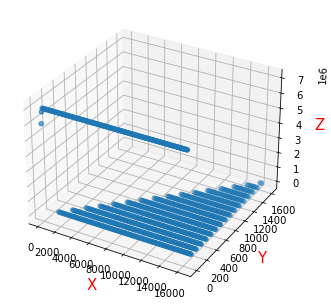

In [25]:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  
 
 
# 数据
x = data[:, 1]  
y = data[:, 2]  
z = data[:, -1]  
 
 
# 绘制散点图
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x, y, z)
 
 
# 添加坐标轴(顺序是Z, Y, X)
ax.set_zlabel('Z', fontdict={'size': 15, 'color': 'red'})
ax.set_ylabel('Y', fontdict={'size': 15, 'color': 'red'})
ax.set_xlabel('X', fontdict={'size': 15, 'color': 'red'})
plt.show()

<ipython-input-1-4b74946dc363>:32: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)
/home/xiangpan/.conda/envs/pl/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 39034 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/xiangpan/.conda/envs/pl/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 24207 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/xiangpan/.conda/envs/pl/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 28857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/xiangpan/.con

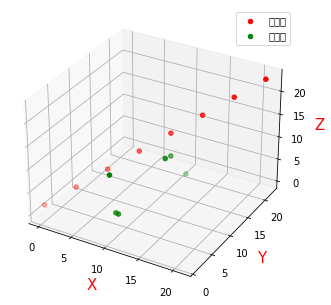

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # 空间三维画图
 
 
# 数据
 
# 数据１
data1 = np.arange(24).reshape((8, 3))
# data的值如下：
# [[ 0  1  2]
#  [ 3  4  5]
#  [ 6  7  8]
#  [ 9 10 11]
#  [12 13 14]
#  [15 16 17]
#  [18 19 20]
#  [21 22 23]]
x1 = data1[:, 0]  # [ 0  3  6  9 12 15 18 21]
y1 = data1[:, 1]  # [ 1  4  7 10 13 16 19 22]
z1 = data1[:, 2]  # [ 2  5  8 11 14 17 20 23]
 
# 数据２
data2 = np.random.randint(0, 23, (6, 3))
x2 = data2[:, 0]
y2 = data2[:, 1]
z2 = data2[:, 2]
 
 
# 绘制散点图
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x1, y1, z1, c='r', label='顺序点')
ax.scatter(x2, y2, z2, c='g', label='随机点')
 
 
# 绘制图例
ax.legend(loc='best')
 
 
# 添加坐标轴(顺序是Z, Y, X)
ax.set_zlabel('Z', fontdict={'size': 15, 'color': 'red'})
ax.set_ylabel('Y', fontdict={'size': 15, 'color': 'red'})
ax.set_xlabel('X', fontdict={'size': 15, 'color': 'red'})
 
 
# 展示
plt.show()

In [20]:
a = [[1,2],[3,4]]

In [45]:
configs = dfs(a,[],0)

1 0
[1, 3] 1
[1, 4] 1
2 0
[2, 3] 1
[2, 4] 1


In [27]:
for i in configs:
    print(i)

In [31]:
configs[0]

TypeError: 'generator' object is not subscriptable

# ANN_SIFT1M

## convert

In [99]:
cd HOBO

/home/xiangpan/Labs/HOBO


In [100]:
import numpy as np

In [101]:
collection_name = 'sift'
collection_param = {
    "collection_name": collection_name,
    "dimension": 128,
#     "index_file_size": 2048,
    "metric_type": MetricType.L2
}
client.create_collection(collection_param)

Status(code=0, message='Create collection successfully!')

In [97]:
client.drop_collection("sift")

Status(code=0, message='Delete collection successfully!')

In [102]:
client.list_collections()

(Status(code=0, message='Show collections successfully!'),
 ['demo_film_tutorial', 'siftsmall', 'sift'])

In [103]:
mkdir ./cached_datasets/sift_numpy

mkdir: cannot create directory ‘./cached_datasets/sift_numpy’: File exists


In [104]:
import numpy as np
fv = np.fromfile("./cached_datasets/sift/sift_query.fvecs", dtype="int32")
dim = fv.view(np.int32)[0]
new = fv.reshape(-1, dim + 1)[:,1:] # reshapes file
f_new = new.view(np.float32)
np.save("./cached_datasets/sift_numpy/sift_query",f_new)

## insert

In [154]:
sift_base = np.load("./cached_datasets/sift_numpy/sift_base.npy")

In [106]:
siftsmall_base.shape

(1000000, 128)

In [159]:
id_count = 0
def get_batch():
    entity_ids = [i for i in range(len(siftsmall_base))]
    entities = siftsmall_base
    collection_name = "sift"
    id_count += batch_size

In [160]:
import os
import pandas as pd
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self, transform=None, target_transform=None):
        self.data = sift_base
        self.labels = [i for i in range(len(siftsmall_base))]

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        x = self.data[idx]
        y = self.labels[idx]
        return x,y

In [161]:
from torch.utils.data import DataLoader

dataset = CustomDataset()
dataloader = DataLoader(dataset, batch_size=1024, shuffle=False)

In [164]:
for batch in dataloader:
    entities, entity_ids = batch
    status, ids = client.insert(collection_name, entities.numpy(), entity_ids.numpy().tolist())

[tensor([[ 0., 16., 35.,  ..., 25., 23.,  1.],
        [14., 35., 19.,  ..., 11., 21., 33.],
        [ 0.,  1.,  5.,  ...,  4., 23., 10.],
        ...,
        [ 1., 57., 30.,  ..., 10., 16., 18.],
        [ 3.,  3.,  8.,  ..., 70., 15.,  1.],
        [18., 14.,  1.,  ..., 61., 65.,  1.]]), tensor([   0,    1,    2,  ..., 1021, 1022, 1023])]
[tensor([[24., 25., 28.,  ..., 18., 15., 14.],
        [10., 14.,  8.,  ..., 20., 83., 52.],
        [ 0.,  6., 44.,  ..., 33., 73., 26.],
        ...,
        [22.,  4.,  1.,  ...,  0.,  2., 15.],
        [28., 10.,  0.,  ..., 17., 10., 28.],
        [ 5., 15., 44.,  ..., 12., 28.,  6.]]), tensor([1024, 1025, 1026,  ..., 2045, 2046, 2047])]
[tensor([[ 39.,   5.,   0.,  ...,  97., 136.,  12.],
        [  1.,   1.,   2.,  ...,  48.,  45.,   3.],
        [  0.,  32.,  24.,  ...,   0.,   0.,   8.],
        ...,
        [  0.,   0.,   0.,  ...,  42.,  33.,  17.],
        [  1.,  12.,  20.,  ...,  51.,  19.,   0.],
        [  9.,  13.,  15.,  ...,  22.,

In [135]:
for i in 

(array([  0.,  16.,  35.,   5.,  32.,  31.,  14.,  10.,  11.,  78.,  55.,
         10.,  45.,  83.,  11.,   6.,  14.,  57., 102.,  75.,  20.,   8.,
          3.,   5.,  67.,  17.,  19.,  26.,   5.,   0.,   1.,  22.,  60.,
         26.,   7.,   1.,  18.,  22.,  84.,  53.,  85., 119., 119.,   4.,
         24.,  18.,   7.,   7.,   1.,  81., 106., 102.,  72.,  30.,   6.,
          0.,   9.,   1.,   9., 119.,  72.,   1.,   4.,  33., 119.,  29.,
          6.,   1.,   0.,   1.,  14.,  52., 119.,  30.,   3.,   0.,   0.,
         55.,  92., 111.,   2.,   5.,   4.,   9.,  22.,  89.,  96.,  14.,
          1.,   0.,   1.,  82.,  59.,  16.,  20.,   5.,  25.,  14.,  11.,
          4.,   0.,   0.,   1.,  26.,  47.,  23.,   4.,   0.,   0.,   4.,
         38.,  83.,  30.,  14.,   9.,   4.,   9.,  17.,  23.,  41.,   0.,
          0.,   2.,   8.,  19.,  25.,  23.,   1.], dtype=float32),
 0)

In [109]:
status

Status(code=11, message='The amount of data inserted each time cannot exceed 256 MB')

## serch

In [169]:
sift_groundtruth = np.load("./cached_datasets/sift_numpy/sift_groundtruth.npy")
sift_groundtruth.shape

(10000, 100)

In [170]:
query_vectors = np.load("./cached_datasets/sift_numpy/sift_query.npy")
query_vectors.shape

(10000, 128)

In [185]:
collection_name = 'sift'
statue, res = client.search(collection_name, top_k = 100, query_records = query_vectors, params={"nprobe": 512 })
# int. 1~nlist(cpu), 1~min[2048, nlist](gpu)

In [186]:
res

[
 [ (id:932085, distance:54229.0),
   (id:934876, distance:55091.0),
   (id:561813, distance:59531.0),
   ...
   (id:989762, distance:83466.0) ]

 [ (id:413247, distance:51187.0),
   (id:413071, distance:52570.0),
   (id:706838, distance:54813.0),
   ...
   (id:987074, distance:66681.0) ]

 [ (id:669835, distance:30792.0),
   (id:408764, distance:31091.0),
   (id:408462, distance:33608.0),
   ...
   (id:937903, distance:45842.0) ]

        ......
            ......
]

In [187]:
converted_res = np.zeros(res.shape)
for i in range(len(res)):
    for j in range(len(res[i])):
        converted_res[i][j] = res[i][j].id

In [188]:
converted_res

array([[932085., 934876., 561813., ..., 398306., 931721., 989762.],
       [413247., 413071., 706838., ..., 855176., 846198., 987074.],
       [669835., 408764., 408462., ..., 310475., 971815., 937903.],
       ...,
       [123855., 123351., 534149., ...,  90175., 685486., 416474.],
       [755327., 755323., 840765., ..., 595134., 601257., 172180.],
       [874343., 464509., 413340., ..., 360985., 419949., 223427.]])

In [189]:
preds = converted_res

In [190]:
targets = sift_groundtruth

In [191]:
recall_total = 0
for i in range(len(targets)):
    recall_single = len(set(preds[i]) & set(targets[i]))
    recall_total += recall_single
avg_recall = recall_total/len(preds)
avg_recall

0.0

In [58]:
preds

array([[2176., 3752.,  882., ...,  348., 3043., 3687.],
       [2781., 9574., 2492., ..., 3849., 2905., 4102.],
       [2707., 9938., 2698., ..., 1251., 8564., 8173.],
       ...,
       [1272., 1565., 1045., ..., 9608., 9645.,  121.],
       [9655., 9663., 3102., ..., 2077., 2775., 3624.],
       [1062., 6792.,  741., ..., 6444., 1934.,  740.]])

# Grid Search Results

In [7]:
cd ..

/home/xiangpan/Labs/HOBO


In [8]:
import numpy as np
import pandas as pd

In [14]:
def sign(x, threshold):
    if x > threshold:
        return x - threshold
    else:
        return 100000 * (threshold - x)

In [28]:
def fun(series):
#     print(series)
    loss = sign(series['recall'], 95) - series['query_per_sec']
    return loss

## IVF_FLAT

In [35]:
file_name = "./grid_search_results/IVF_FLAT.csv"

In [42]:
df = pd.read_csv(file_name)
df["loss"] = df.apply(fun,axis=1)
df.to_csv(file_name)
index = df['loss'].idxmin()
df.iloc[index,:]

Unnamed: 0               1126
index_type           IVF_FLAT
nlist                   14601
nprobe                    101
recall                  100.0
query_per_sec    14402.032758
loss            -14397.032758
Name: 1126, dtype: object

## IVF_SQ8

In [43]:
file_name = "./grid_search_results/IVF_SQ8.csv"

In [45]:
df = pd.read_csv(file_name)
df["loss"] = df.apply(fun,axis=1)
df.to_csv(file_name)
index = df['loss'].idxmin()
df.iloc[index,:]

index_type           IVF_SQ8
nlist                   5401
nprobe                   101
recall                 99.49
query_per_sec    13080.62997
loss            -13076.13997
Name: 169, dtype: object

## HNSW

In [46]:
file_name = "./grid_search_results/HNSW.csv"

In [47]:
df = pd.read_csv(file_name)
df["loss"] = df.apply(fun,axis=1)
df.to_csv(file_name)
index = df['loss'].idxmin()
df.iloc[index,:]

index_type                HNSW
M                            4
efConstruction             158
ef                         200
recall                   97.11
query_per_sec     18331.748252
loss             -18329.638252
Name: 982, dtype: object

## IVF_PQ

In [50]:
file_name = "./grid_search_results/IVF_PQ.csv"

In [52]:
df = pd.read_csv(file_name)
df["loss"] = df.apply(fun,axis=1)
df.to_csv(file_name)
index = df['loss'].idxmin()
df.iloc[index,:]

index_type             IVF_PQ
nlist                     301
M                           8
nprobe                     30
recall                  96.94
query_per_sec    18080.455212
loss            -18078.515212
Name: 46, dtype: object

# Viz

## IVF_FLAT

In [4]:
cd ..

/home/xiangpan/Labs/HOBO


In [107]:
import pandas as pd
import matplotlib.pyplot as plt

In [117]:
index_type = "IVF_FLAT"

In [118]:
file_name = "./grid_search_results/"+index_type+".csv"

In [119]:
df = pd.read_csv(file_name)

In [120]:
df.to_csv(file_name,index = False)

In [121]:
df

,index_type,nlist,nprobe,recall,query_per_sec,loss
0,IVF_FLAT,101,1,35.03,13865.926146,6.010866e+06
1,IVF_FLAT,201,1,27.33,14441.206445,6.781441e+06
2,IVF_FLAT,301,1,24.88,14846.042758,7.026846e+06
3,IVF_FLAT,401,1,24.88,14262.944197,7.026263e+06
4,IVF_FLAT,501,1,24.88,14554.964084,7.026555e+06
...,...,...,...,...,...,...
1406,IVF_FLAT,16301,1201,100.00,8154.888885,8.159889e+03
1407,IVF_FLAT,16301,1301,100.00,8929.941025,8.934941e+03
1408,IVF_FLAT,16301,1401,100.00,8343.054920,8.348055e+03
1409,IVF_FLAT,16301,1501,100.00,8468.551123,8.473551e+03


101
  index_type  nlist  nprobe  recall  query_per_sec          loss
0   IVF_FLAT    101       1   35.03   13865.926146  6.010866e+06


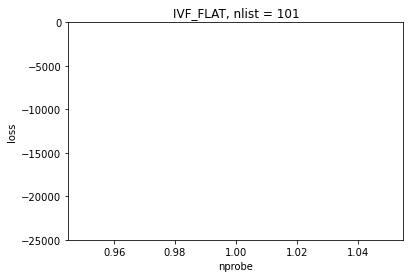

1101
   index_type  nlist  nprobe  recall  query_per_sec          loss
10   IVF_FLAT   1101       1   24.88   14612.772184  7.026613e+06
11   IVF_FLAT   1101     101  100.00   12301.454716  1.230645e+04


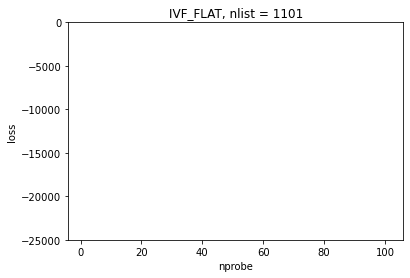

2101
   index_type  nlist  nprobe  recall  query_per_sec          loss
30   IVF_FLAT   2101       1   24.88   14203.054417  7.026203e+06
31   IVF_FLAT   2101     101  100.00   10603.994539  1.060899e+04
32   IVF_FLAT   2101     201  100.00    9186.350694  9.191351e+03


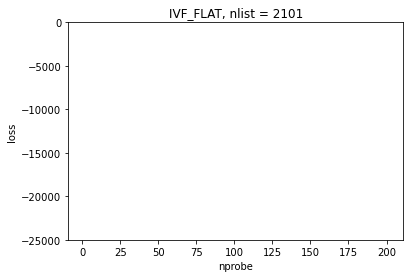

3101
   index_type  nlist  nprobe  recall  query_per_sec          loss
60   IVF_FLAT   3101       1   24.88   15015.049760  7.027015e+06
61   IVF_FLAT   3101     101  100.00   12111.764366  1.211676e+04
62   IVF_FLAT   3101     201  100.00    9786.513603  9.791514e+03
63   IVF_FLAT   3101     301  100.00    9400.264461  9.405264e+03


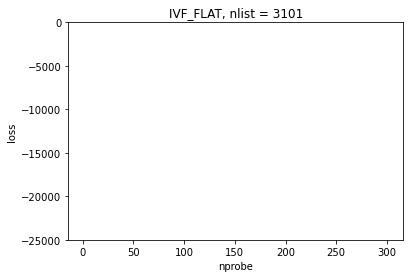

4101
    index_type  nlist  nprobe  recall  query_per_sec          loss
100   IVF_FLAT   4101       1   24.88    7893.674602  7.019894e+06
101   IVF_FLAT   4101     101  100.00   11810.283269  1.181528e+04
102   IVF_FLAT   4101     201  100.00   10021.752843  1.002675e+04
103   IVF_FLAT   4101     301  100.00    9740.830024  9.745830e+03
104   IVF_FLAT   4101     401  100.00    8311.642193  8.316642e+03


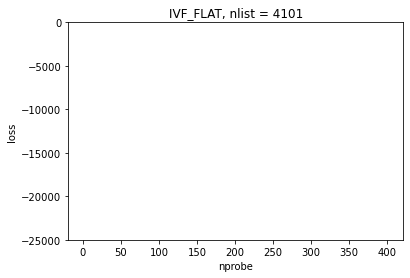

5101
    index_type  nlist  nprobe  recall  query_per_sec          loss
150   IVF_FLAT   5101       1   24.88   14190.080520  7.026190e+06
151   IVF_FLAT   5101     101  100.00    9951.135258  9.956135e+03
152   IVF_FLAT   5101     201  100.00    9414.189841  9.419190e+03
153   IVF_FLAT   5101     301  100.00    9667.859119  9.672859e+03
154   IVF_FLAT   5101     401  100.00    9281.281671  9.286282e+03
155   IVF_FLAT   5101     501  100.00   10092.408383  1.009741e+04


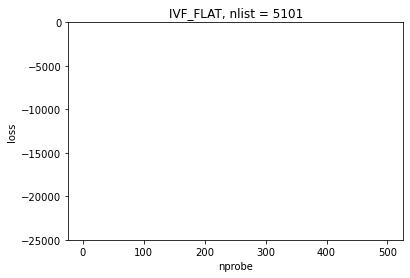

6101
    index_type  nlist  nprobe  recall  query_per_sec          loss
210   IVF_FLAT   6101       1   24.88   14977.517498  7.026978e+06
211   IVF_FLAT   6101     101  100.00   12517.694810  1.252269e+04
212   IVF_FLAT   6101     201  100.00   10703.031540  1.070803e+04
213   IVF_FLAT   6101     301  100.00   10249.007917  1.025401e+04
214   IVF_FLAT   6101     401  100.00    8542.718644  8.547719e+03
215   IVF_FLAT   6101     501  100.00    9402.371719  9.407372e+03
216   IVF_FLAT   6101     601  100.00    9434.730970  9.439731e+03


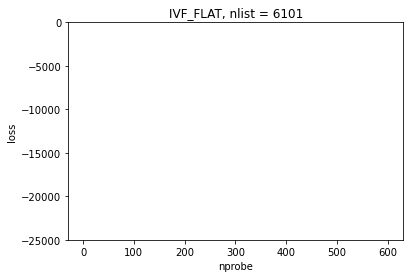

7101
    index_type  nlist  nprobe  recall  query_per_sec          loss
280   IVF_FLAT   7101       1   24.88   14770.756445  7.026771e+06
281   IVF_FLAT   7101     101  100.00   11954.692889  1.195969e+04
282   IVF_FLAT   7101     201  100.00   11327.996543  1.133300e+04
283   IVF_FLAT   7101     301  100.00   10227.515240  1.023252e+04
284   IVF_FLAT   7101     401  100.00    8969.470938  8.974471e+03
285   IVF_FLAT   7101     501  100.00   10033.259975  1.003826e+04
286   IVF_FLAT   7101     601  100.00    9966.268267  9.971268e+03
287   IVF_FLAT   7101     701  100.00   10362.958937  1.036796e+04


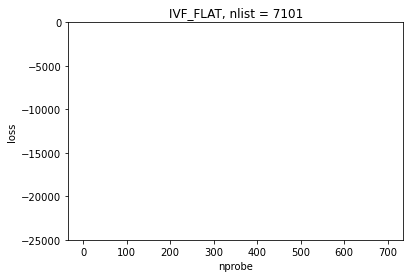

8101
    index_type  nlist  nprobe  recall  query_per_sec          loss
360   IVF_FLAT   8101       1   24.88   13428.648268  7.025429e+06
361   IVF_FLAT   8101     101  100.00   14063.519313  1.406852e+04
362   IVF_FLAT   8101     201  100.00   11503.219790  1.150822e+04
363   IVF_FLAT   8101     301  100.00   10507.299965  1.051230e+04
364   IVF_FLAT   8101     401  100.00   10189.252745  1.019425e+04
365   IVF_FLAT   8101     501  100.00   10355.794776  1.036079e+04
366   IVF_FLAT   8101     601  100.00   10257.279108  1.026228e+04
367   IVF_FLAT   8101     701  100.00   10546.932207  1.055193e+04
368   IVF_FLAT   8101     801  100.00   10413.904062  1.041890e+04


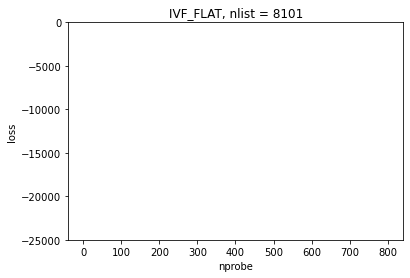

9101
    index_type  nlist  nprobe  recall  query_per_sec          loss
450   IVF_FLAT   9101       1   24.88   14545.373838  7.026545e+06
451   IVF_FLAT   9101     101  100.00   12767.271399  1.277227e+04
452   IVF_FLAT   9101     201  100.00   11415.867832  1.142087e+04
453   IVF_FLAT   9101     301  100.00   10227.764637  1.023276e+04
454   IVF_FLAT   9101     401  100.00   10356.561890  1.036156e+04
455   IVF_FLAT   9101     501  100.00   10141.947964  1.014695e+04
456   IVF_FLAT   9101     601  100.00    9550.524854  9.555525e+03
457   IVF_FLAT   9101     701  100.00    9879.643850  9.884644e+03
458   IVF_FLAT   9101     801  100.00    9707.913436  9.712913e+03
459   IVF_FLAT   9101     901  100.00    9722.089843  9.727090e+03


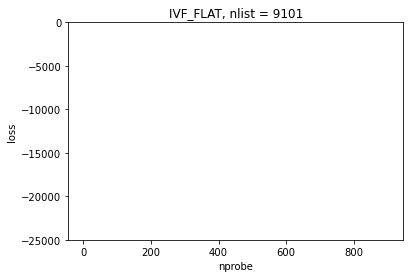

10101
    index_type  nlist  nprobe  recall  query_per_sec          loss
550   IVF_FLAT  10101       1   24.88   14751.535188  7.026752e+06
551   IVF_FLAT  10101     101  100.00   13527.394698  1.353239e+04
552   IVF_FLAT  10101     201  100.00   11457.342657  1.146234e+04
553   IVF_FLAT  10101     301  100.00   10398.413328  1.040341e+04
554   IVF_FLAT  10101     401  100.00    8832.717011  8.837717e+03
555   IVF_FLAT  10101     501  100.00    9763.959308  9.768959e+03
556   IVF_FLAT  10101     601  100.00    9399.843123  9.404843e+03
557   IVF_FLAT  10101     701  100.00    8547.941632  8.552942e+03
558   IVF_FLAT  10101     801  100.00    9881.505913  9.886506e+03
559   IVF_FLAT  10101     901  100.00    9599.707040  9.604707e+03
560   IVF_FLAT  10101    1001  100.00    9258.131732  9.263132e+03


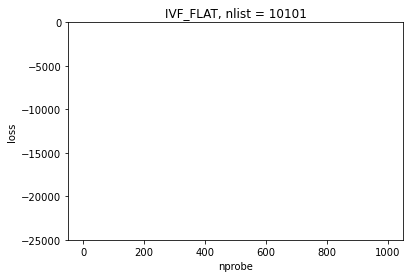

11101
    index_type  nlist  nprobe  recall  query_per_sec          loss
660   IVF_FLAT  11101       1   24.88   13219.982980  7.025220e+06
661   IVF_FLAT  11101     101  100.00   10692.390445  1.069739e+04
662   IVF_FLAT  11101     201  100.00   11090.174511  1.109517e+04
663   IVF_FLAT  11101     301  100.00    9829.401701  9.834402e+03
664   IVF_FLAT  11101     401  100.00    8815.637480  8.820637e+03
665   IVF_FLAT  11101     501  100.00    8577.835041  8.582835e+03
666   IVF_FLAT  11101     601  100.00    9844.397503  9.849398e+03
667   IVF_FLAT  11101     701  100.00    9534.242590  9.539243e+03
668   IVF_FLAT  11101     801  100.00    9169.080098  9.174080e+03
669   IVF_FLAT  11101     901  100.00   10156.683456  1.016168e+04
670   IVF_FLAT  11101    1001  100.00    8757.655607  8.762656e+03
671   IVF_FLAT  11101    1101  100.00    9638.975962  9.643976e+03


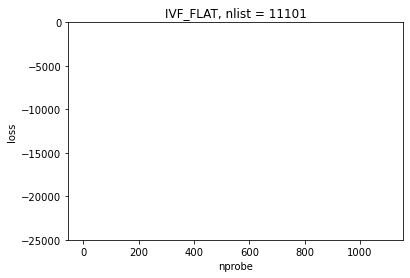

12101
    index_type  nlist  nprobe  recall  query_per_sec          loss
780   IVF_FLAT  12101       1   24.88   14565.072751  7.026565e+06
781   IVF_FLAT  12101     101  100.00   11799.651156  1.180465e+04
782   IVF_FLAT  12101     201  100.00   10911.584589  1.091658e+04
783   IVF_FLAT  12101     301  100.00    8624.044412  8.629044e+03
784   IVF_FLAT  12101     401  100.00    8886.049024  8.891049e+03
785   IVF_FLAT  12101     501  100.00    8803.425405  8.808425e+03
786   IVF_FLAT  12101     601  100.00    8733.402740  8.738403e+03
787   IVF_FLAT  12101     701  100.00    8791.615662  8.796616e+03
788   IVF_FLAT  12101     801  100.00    8668.424751  8.673425e+03
789   IVF_FLAT  12101     901  100.00    8708.198900  8.713199e+03
790   IVF_FLAT  12101    1001  100.00    9176.904059  9.181904e+03
791   IVF_FLAT  12101    1101  100.00    9657.841534  9.662842e+03
792   IVF_FLAT  12101    1201  100.00    9004.903603  9.009904e+03


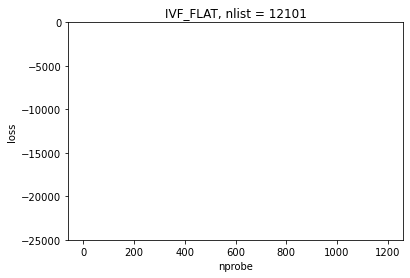

13101
    index_type  nlist  nprobe  recall  query_per_sec          loss
910   IVF_FLAT  13101       1   24.88   14664.373121  7.026664e+06
911   IVF_FLAT  13101     101  100.00   12266.198748  1.227120e+04
912   IVF_FLAT  13101     201  100.00    9624.599004  9.629599e+03
913   IVF_FLAT  13101     301  100.00    8066.279472  8.071279e+03
914   IVF_FLAT  13101     401  100.00   10074.227795  1.007923e+04
915   IVF_FLAT  13101     501  100.00    9632.998783  9.637999e+03
916   IVF_FLAT  13101     601  100.00    9140.904435  9.145904e+03
917   IVF_FLAT  13101     701  100.00    9455.788263  9.460788e+03
918   IVF_FLAT  13101     801  100.00    9501.198324  9.506198e+03
919   IVF_FLAT  13101     901  100.00    7988.541825  7.993542e+03
920   IVF_FLAT  13101    1001  100.00    9430.276323  9.435276e+03
921   IVF_FLAT  13101    1101  100.00    8023.537064  8.028537e+03
922   IVF_FLAT  13101    1201  100.00    7887.440059  7.892440e+03
923   IVF_FLAT  13101    1301  100.00    7290.131053  7.

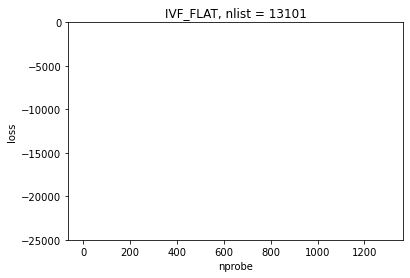

14101
     index_type  nlist  nprobe  recall  query_per_sec          loss
1050   IVF_FLAT  14101       1   24.88   14615.318141  7.026615e+06
1051   IVF_FLAT  14101     101  100.00   12511.347095  1.251635e+04
1052   IVF_FLAT  14101     201  100.00    9539.663839  9.544664e+03
1053   IVF_FLAT  14101     301  100.00    8739.043650  8.744044e+03
1054   IVF_FLAT  14101     401  100.00    8635.763553  8.640764e+03
1055   IVF_FLAT  14101     501  100.00    8653.580639  8.658581e+03
1056   IVF_FLAT  14101     601  100.00    9619.080818  9.624081e+03
1057   IVF_FLAT  14101     701  100.00    8546.374065  8.551374e+03
1058   IVF_FLAT  14101     801  100.00    8832.345013  8.837345e+03
1059   IVF_FLAT  14101     901  100.00    8697.905520  8.702906e+03
1060   IVF_FLAT  14101    1001  100.00    9095.905621  9.100906e+03
1061   IVF_FLAT  14101    1101  100.00    9869.879518  9.874880e+03
1062   IVF_FLAT  14101    1201  100.00    9610.044679  9.615045e+03
1063   IVF_FLAT  14101    1301  100.00    

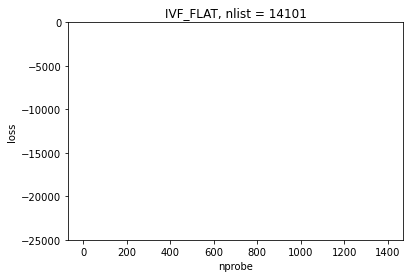

15101
     index_type  nlist  nprobe  recall  query_per_sec          loss
1200   IVF_FLAT  15101       1   24.88   14271.194284  7.026271e+06
1201   IVF_FLAT  15101     101  100.00   12569.462675  1.257446e+04
1202   IVF_FLAT  15101     201  100.00   10548.523716  1.055352e+04
1203   IVF_FLAT  15101     301  100.00    8849.489408  8.854489e+03
1204   IVF_FLAT  15101     401  100.00    8814.340654  8.819341e+03
1205   IVF_FLAT  15101     501  100.00    8636.296998  8.641297e+03
1206   IVF_FLAT  15101     601  100.00    9124.598081  9.129598e+03
1207   IVF_FLAT  15101     701  100.00   10053.702150  1.005870e+04
1208   IVF_FLAT  15101     801  100.00    9614.230046  9.619230e+03
1209   IVF_FLAT  15101     901  100.00    8566.447449  8.571447e+03
1210   IVF_FLAT  15101    1001  100.00    8701.875519  8.706876e+03
1211   IVF_FLAT  15101    1101  100.00    9575.162086  9.580162e+03
1212   IVF_FLAT  15101    1201  100.00    9039.643096  9.044643e+03
1213   IVF_FLAT  15101    1301  100.00    

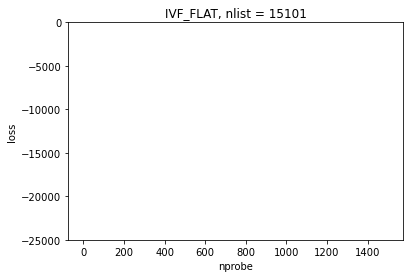

16101
     index_type  nlist  nprobe  recall  query_per_sec          loss
1360   IVF_FLAT  16101       1   24.88   12770.381196  7.024770e+06
1361   IVF_FLAT  16101     101  100.00   12045.674899  1.205067e+04
1362   IVF_FLAT  16101     201  100.00    9764.413922  9.769414e+03
1363   IVF_FLAT  16101     301  100.00    8868.387779  8.873388e+03
1364   IVF_FLAT  16101     401  100.00    8643.950292  8.648950e+03
1365   IVF_FLAT  16101     501  100.00    8499.440707  8.504441e+03
1366   IVF_FLAT  16101     601  100.00    8668.424751  8.673425e+03
1367   IVF_FLAT  16101     701  100.00    8732.493598  8.737494e+03
1368   IVF_FLAT  16101     801  100.00    8961.422101  8.966422e+03
1369   IVF_FLAT  16101     901  100.00    9687.061758  9.692062e+03
1370   IVF_FLAT  16101    1001  100.00    9426.037710  9.431038e+03
1371   IVF_FLAT  16101    1101  100.00    8590.836286  8.595836e+03
1372   IVF_FLAT  16101    1201  100.00    9486.799964  9.491800e+03
1373   IVF_FLAT  16101    1301  100.00    

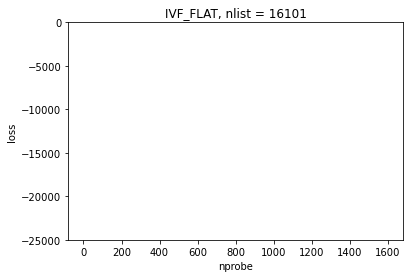

In [122]:
for i in range(101,16301,1000):
    print(i)
    sub = df[df["nlist"] == i]
    print(sub)
    x = sub["nprobe"]
    y = sub["loss"]
    plt.xlabel('nprobe')
    plt.ylabel('loss')
    title = index_type+', nlist = '+ str(i)
    plt.title(title)
    plt.ylim(-25000, 0)
    plt.plot(x,y)
    plt.savefig("./figures/"+title)
    
    plt.show()


## IVF_SQ8

In [86]:
import pandas as pd
import matplotlib.pyplot as plt

In [87]:
index_type = "IVF_SQ8"

In [88]:
file_name = "./grid_search_results/"+index_type+".csv"

In [89]:
df = pd.read_csv(file_name)

In [91]:
df

,index_type,nlist,nprobe,recall,query_per_sec,loss
0,IVF_SQ8,101,1,35.03,17153.915995,5.979846e+06
1,IVF_SQ8,201,1,27.33,17174.285480,6.749826e+06
2,IVF_SQ8,301,1,24.88,18222.635443,6.993777e+06
3,IVF_SQ8,401,1,24.88,17770.968562,6.994229e+06
4,IVF_SQ8,501,1,24.88,16386.560400,6.995613e+06
...,...,...,...,...,...,...
1406,IVF_SQ8,16301,1201,99.49,7416.589748,-7.412100e+03
1407,IVF_SQ8,16301,1301,99.49,6263.707775,-6.259218e+03
1408,IVF_SQ8,16301,1401,99.49,5759.507855,-5.755018e+03
1409,IVF_SQ8,16301,1501,99.49,2636.302153,-2.631812e+03


In [92]:
df.to_csv(file_name,index = False)

101
  index_type  nlist  nprobe  recall  query_per_sec          loss
0    IVF_SQ8    101       1   35.03   17153.915995  5.979846e+06


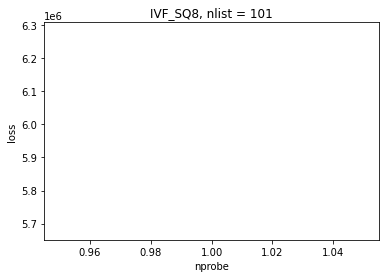

1101
   index_type  nlist  nprobe  recall  query_per_sec          loss
10    IVF_SQ8   1101       1   24.88   18345.378997  6.993655e+06
11    IVF_SQ8   1101     101   99.49   11246.290387 -1.124180e+04


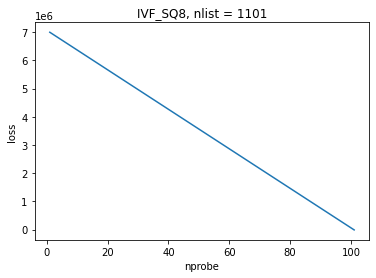

2101
   index_type  nlist  nprobe  recall  query_per_sec          loss
30    IVF_SQ8   2101       1   24.88   18404.142168  6.993596e+06
31    IVF_SQ8   2101     101   99.49   11708.083966 -1.170359e+04
32    IVF_SQ8   2101     201   99.49    8846.876186 -8.842386e+03


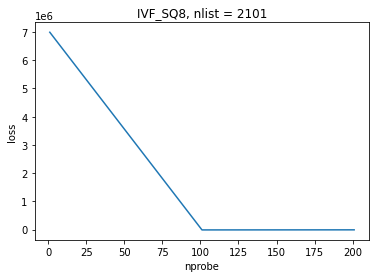

3101
   index_type  nlist  nprobe  recall  query_per_sec          loss
60    IVF_SQ8   3101       1   24.88   14214.124983  6.997786e+06
61    IVF_SQ8   3101     101   99.49   10269.836684 -1.026535e+04
62    IVF_SQ8   3101     201   99.49    8068.917489 -8.064427e+03
63    IVF_SQ8   3101     301   99.49    8255.041430 -8.250551e+03


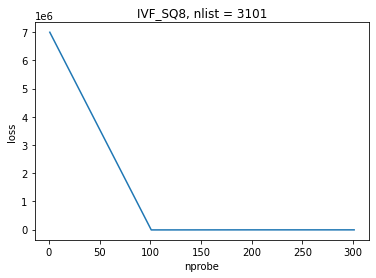

4101
    index_type  nlist  nprobe  recall  query_per_sec          loss
100    IVF_SQ8   4101       1   24.88   14829.770534  6.997170e+06
101    IVF_SQ8   4101     101   99.49    9283.335916 -9.278846e+03
102    IVF_SQ8   4101     201   99.49    7480.878235 -7.476388e+03
103    IVF_SQ8   4101     301   99.49    7229.688874 -7.225199e+03
104    IVF_SQ8   4101     401   99.49    5068.767825 -5.064278e+03


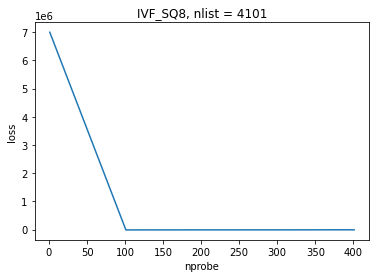

5101
    index_type  nlist  nprobe  recall  query_per_sec          loss
150    IVF_SQ8   5101       1   24.88   13130.177811  6.998870e+06
151    IVF_SQ8   5101     101   99.49    8160.124514 -8.155635e+03
152    IVF_SQ8   5101     201   99.49    7168.402523 -7.163913e+03
153    IVF_SQ8   5101     301   99.49    7084.733624 -7.080244e+03
154    IVF_SQ8   5101     401   99.49    5867.472441 -5.862982e+03
155    IVF_SQ8   5101     501   99.49    4011.845277 -4.007355e+03


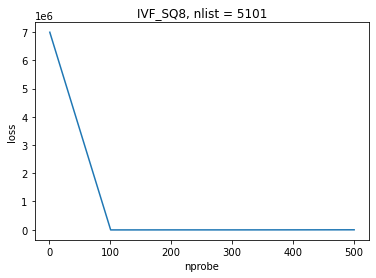

6101
    index_type  nlist  nprobe  recall  query_per_sec          loss
210    IVF_SQ8   6101       1   24.88    9769.872586  7.002230e+06
211    IVF_SQ8   6101     101   99.49    9085.659822 -9.081170e+03
212    IVF_SQ8   6101     201   99.49    6606.243503 -6.601754e+03
213    IVF_SQ8   6101     301   99.49    8532.465366 -8.527975e+03
214    IVF_SQ8   6101     401   99.49    5626.086840 -5.621597e+03
215    IVF_SQ8   6101     501   99.49    4551.160494 -4.546670e+03
216    IVF_SQ8   6101     601   99.49    4637.869875 -4.633380e+03


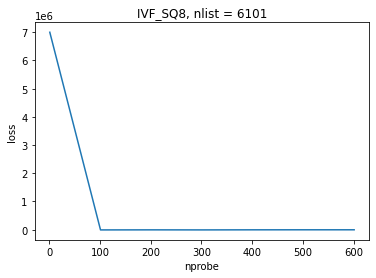

7101
    index_type  nlist  nprobe  recall  query_per_sec          loss
280    IVF_SQ8   7101       1   24.88    8313.619155  7.003686e+06
281    IVF_SQ8   7101     101   99.49    8138.274671 -8.133785e+03
282    IVF_SQ8   7101     201   99.49    8179.060471 -8.174570e+03
283    IVF_SQ8   7101     301   99.49    4396.084268 -4.391594e+03
284    IVF_SQ8   7101     401   99.49    3474.608369 -3.470118e+03
285    IVF_SQ8   7101     501   99.49    5581.985627 -5.577496e+03
286    IVF_SQ8   7101     601   99.49    6560.262767 -6.555773e+03
287    IVF_SQ8   7101     701   99.49    7289.117514 -7.284628e+03


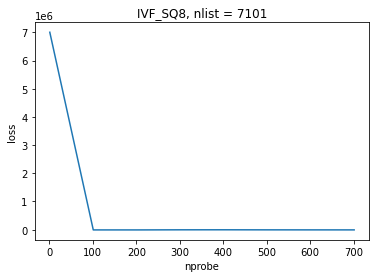

8101
    index_type  nlist  nprobe  recall  query_per_sec          loss
360    IVF_SQ8   8101       1   24.88    9696.019233  7.002304e+06
361    IVF_SQ8   8101     101   99.49    6609.887322 -6.605397e+03
362    IVF_SQ8   8101     201   99.49    7094.320219 -7.089830e+03
363    IVF_SQ8   8101     301   99.49    7471.549958 -7.467060e+03
364    IVF_SQ8   8101     401   99.49    2962.623081 -2.958133e+03
365    IVF_SQ8   8101     501   99.49    3490.947831 -3.486458e+03
366    IVF_SQ8   8101     601   99.49    5954.688587 -5.950199e+03
367    IVF_SQ8   8101     701   99.49    6684.682445 -6.680192e+03
368    IVF_SQ8   8101     801   99.49    7413.705700 -7.409216e+03


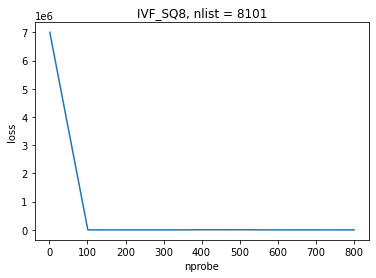

9101
    index_type  nlist  nprobe  recall  query_per_sec          loss
450    IVF_SQ8   9101       1   24.88    9061.124673  7.002939e+06
451    IVF_SQ8   9101     101   99.49    5689.969341 -5.685479e+03
452    IVF_SQ8   9101     201   99.49    5121.187775 -5.116698e+03
453    IVF_SQ8   9101     301   99.49    7768.380501 -7.763891e+03
454    IVF_SQ8   9101     401   99.49    7145.687173 -7.141197e+03
455    IVF_SQ8   9101     501   99.49    4607.353216 -4.602863e+03
456    IVF_SQ8   9101     601   99.49    4825.365270 -4.820875e+03
457    IVF_SQ8   9101     701   99.49    5846.616206 -5.842126e+03
458    IVF_SQ8   9101     801   99.49    8227.997489 -8.223507e+03
459    IVF_SQ8   9101     901   99.49    6654.245463 -6.649755e+03


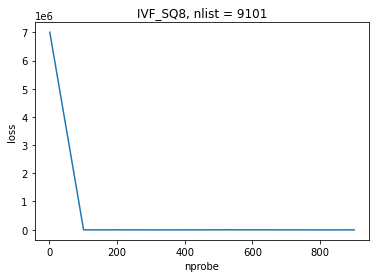

10101
    index_type  nlist  nprobe  recall  query_per_sec          loss
550    IVF_SQ8  10101       1   24.88    5235.419527  7.006765e+06
551    IVF_SQ8  10101     101   99.49   12975.819824 -1.297133e+04
552    IVF_SQ8  10101     201   99.49    5321.910369 -5.317420e+03
553    IVF_SQ8  10101     301   99.49    8190.080450 -8.185590e+03
554    IVF_SQ8  10101     401   99.49    3375.833233 -3.371343e+03
555    IVF_SQ8  10101     501   99.49    3438.827899 -3.434338e+03
556    IVF_SQ8  10101     601   99.49    7760.618732 -7.756129e+03
557    IVF_SQ8  10101     701   99.49    5266.116740 -5.261627e+03
558    IVF_SQ8  10101     801   99.49    7867.319416 -7.862829e+03
559    IVF_SQ8  10101     901   99.49    4547.163920 -4.542674e+03
560    IVF_SQ8  10101    1001   99.49    3953.831941 -3.949342e+03


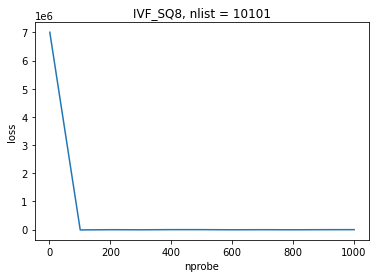

11101
    index_type  nlist  nprobe  recall  query_per_sec          loss
660    IVF_SQ8  11101       1   24.88    7552.269658  7.004448e+06
661    IVF_SQ8  11101     101   99.49    9345.180696 -9.340691e+03
662    IVF_SQ8  11101     201   99.49    4616.074750 -4.611585e+03
663    IVF_SQ8  11101     301   99.49    3829.260588 -3.824771e+03
664    IVF_SQ8  11101     401   99.49    5188.786897 -5.184297e+03
665    IVF_SQ8  11101     501   99.49    4696.763790 -4.692274e+03
666    IVF_SQ8  11101     601   99.49    7014.824726 -7.010335e+03
667    IVF_SQ8  11101     701   99.49    4996.073947 -4.991584e+03
668    IVF_SQ8  11101     801   99.49    4373.941789 -4.369452e+03
669    IVF_SQ8  11101     901   99.49    6010.753798 -6.006264e+03
670    IVF_SQ8  11101    1001   99.49    4472.206939 -4.467717e+03
671    IVF_SQ8  11101    1101   99.49    4749.630838 -4.745141e+03


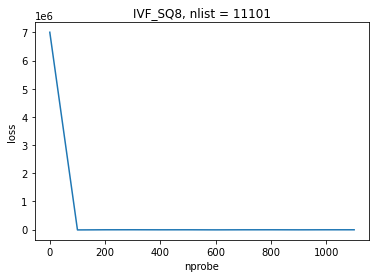

12101
    index_type  nlist  nprobe  recall  query_per_sec          loss
780    IVF_SQ8  12101       1   24.88    3070.388346  7.008930e+06
781    IVF_SQ8  12101     101   99.49    5961.628882 -5.957139e+03
782    IVF_SQ8  12101     201   99.49    7967.751373 -7.963261e+03
783    IVF_SQ8  12101     301   99.49    7810.767426 -7.806277e+03
784    IVF_SQ8  12101     401   99.49    4516.852432 -4.512362e+03
785    IVF_SQ8  12101     501   99.49    1877.343264 -1.872853e+03
786    IVF_SQ8  12101     601   99.49    5358.763255 -5.354273e+03
787    IVF_SQ8  12101     701   99.49    7378.362594 -7.373873e+03
788    IVF_SQ8  12101     801   99.49    7468.357045 -7.463867e+03
789    IVF_SQ8  12101     901   99.49    5741.532059 -5.737042e+03
790    IVF_SQ8  12101    1001   99.49    3419.204526 -3.414715e+03
791    IVF_SQ8  12101    1101   99.49    3323.431904 -3.318942e+03
792    IVF_SQ8  12101    1201   99.49    5624.200815 -5.619711e+03


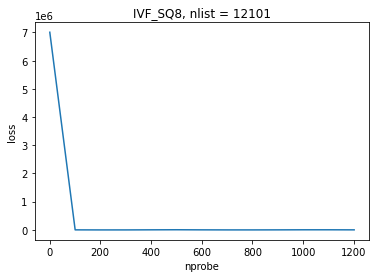

13101
    index_type  nlist  nprobe  recall  query_per_sec          loss
910    IVF_SQ8  13101       1   24.88    4519.285845  7.007481e+06
911    IVF_SQ8  13101     101   99.49    6187.019117 -6.182529e+03
912    IVF_SQ8  13101     201   99.49    8657.510269 -8.653020e+03
913    IVF_SQ8  13101     301   99.49    7084.374631 -7.079885e+03
914    IVF_SQ8  13101     401   99.49    4628.963691 -4.624474e+03
915    IVF_SQ8  13101     501   99.49    2605.513797 -2.601024e+03
916    IVF_SQ8  13101     601   99.49    5046.507767 -5.042018e+03
917    IVF_SQ8  13101     701   99.49    8189.121012 -8.184631e+03
918    IVF_SQ8  13101     801   99.49    8470.774513 -8.466285e+03
919    IVF_SQ8  13101     901   99.49    4997.264452 -4.992774e+03
920    IVF_SQ8  13101    1001   99.49    2448.871114 -2.444381e+03
921    IVF_SQ8  13101    1101   99.49    3858.782833 -3.854293e+03
922    IVF_SQ8  13101    1201   99.49    5403.429396 -5.398939e+03
923    IVF_SQ8  13101    1301   99.49    6054.745716 -6.

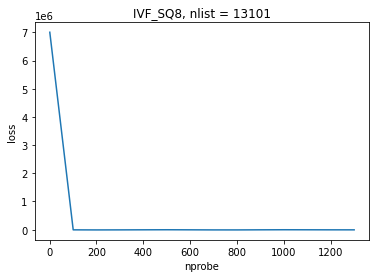

14101
     index_type  nlist  nprobe  recall  query_per_sec          loss
1050    IVF_SQ8  14101       1   24.88   15275.900499  6.996724e+06
1051    IVF_SQ8  14101     101   99.49    4684.384284 -4.679894e+03
1052    IVF_SQ8  14101     201   99.49    3124.016088 -3.119526e+03
1053    IVF_SQ8  14101     301   99.49    6912.168754 -6.907679e+03
1054    IVF_SQ8  14101     401   99.49    3322.194676 -3.317705e+03
1055    IVF_SQ8  14101     501   99.49    7261.858098 -7.257368e+03
1056    IVF_SQ8  14101     601   99.49    4271.228831 -4.266739e+03
1057    IVF_SQ8  14101     701   99.49    4176.013063 -4.171523e+03
1058    IVF_SQ8  14101     801   99.49    7251.061476 -7.246571e+03
1059    IVF_SQ8  14101     901   99.49    4450.898286 -4.446408e+03
1060    IVF_SQ8  14101    1001   99.49    6787.778353 -6.783288e+03
1061    IVF_SQ8  14101    1101   99.49    5219.457684 -5.214968e+03
1062    IVF_SQ8  14101    1201   99.49    5247.996797 -5.243507e+03
1063    IVF_SQ8  14101    1301   99.49    

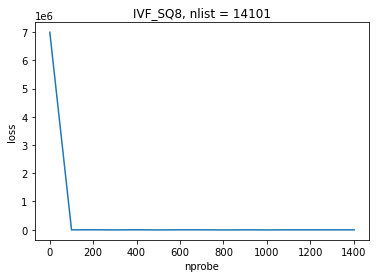

15101
     index_type  nlist  nprobe  recall  query_per_sec          loss
1200    IVF_SQ8  15101       1   24.88   12620.521153  6.999379e+06
1201    IVF_SQ8  15101     101   99.49    3642.248409 -3.637758e+03
1202    IVF_SQ8  15101     201   99.49    6998.321459 -6.993831e+03
1203    IVF_SQ8  15101     301   99.49    6126.201709 -6.121712e+03
1204    IVF_SQ8  15101     401   99.49    2647.367657 -2.642878e+03
1205    IVF_SQ8  15101     501   99.49    7092.880576 -7.088391e+03
1206    IVF_SQ8  15101     601   99.49    4059.606264 -4.055116e+03
1207    IVF_SQ8  15101     701   99.49    7167.422547 -7.162933e+03
1208    IVF_SQ8  15101     801   99.49    6360.209869 -6.355720e+03
1209    IVF_SQ8  15101     901   99.49    3516.675750 -3.512186e+03
1210    IVF_SQ8  15101    1001   99.49    7197.062356 -7.192572e+03
1211    IVF_SQ8  15101    1101   99.49    6835.567145 -6.831077e+03
1212    IVF_SQ8  15101    1201   99.49    6863.643653 -6.859154e+03
1213    IVF_SQ8  15101    1301   99.49    

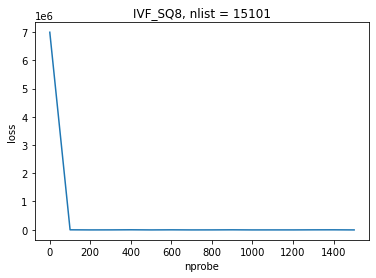

16101
     index_type  nlist  nprobe  recall  query_per_sec          loss
1360    IVF_SQ8  16101       1   24.88    8607.584961  7.003392e+06
1361    IVF_SQ8  16101     101   99.49    7565.619870 -7.561130e+03
1362    IVF_SQ8  16101     201   99.49    4590.561247 -4.586071e+03
1363    IVF_SQ8  16101     301   99.49    3269.800583 -3.265311e+03
1364    IVF_SQ8  16101     401   99.49    1555.243096 -1.550753e+03
1365    IVF_SQ8  16101     501   99.49    5187.760049 -5.183270e+03
1366    IVF_SQ8  16101     601   99.49    7455.877700 -7.451388e+03
1367    IVF_SQ8  16101     701   99.49    5045.050940 -5.040561e+03
1368    IVF_SQ8  16101     801   99.49    6085.051068 -6.080561e+03
1369    IVF_SQ8  16101     901   99.49    3227.554577 -3.223065e+03
1370    IVF_SQ8  16101    1001   99.49    6053.085493 -6.048595e+03
1371    IVF_SQ8  16101    1101   99.49    4104.577927 -4.100088e+03
1372    IVF_SQ8  16101    1201   99.49    5608.857983 -5.604368e+03
1373    IVF_SQ8  16101    1301   99.49    

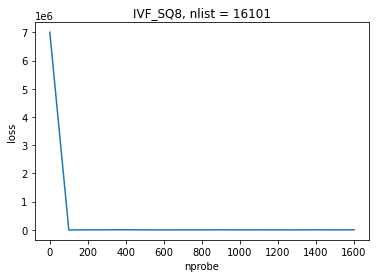

In [93]:
for i in range(101,16301,1000):
    print(i)
    sub = df[df["nlist"] == i]
    print(sub)
    x = sub["nprobe"]
    y = sub["loss"]
    plt.xlabel('nprobe')
    plt.ylabel('loss')
    title = index_type+', nlist = '+ str(i)
    plt.title(title)
    
    
#     plt.ylim(-25000, 0)
    plt.savefig("./figures/"+title)
    plt.plot(x,y)
    plt.show()
    
    
    

## IVF_PQ

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

In [62]:
index_type = "IVF_PQ"

In [63]:
file_name = "./grid_search_results/"+index_type+".csv"

In [64]:
df = pd.read_csv(file_name)

In [65]:
df = df.drop(columns = ["Unnamed: 0"])

In [66]:
df

,index_type,nlist,M,nprobe,recall,query_per_sec,loss
0,IVF_PQ,1,1,1,24.88,19756.495525,6.992244e+06
1,IVF_PQ,1,1,0,0.00,47902.055733,9.452098e+06
2,IVF_PQ,1,1,100,100.00,13967.976555,-1.396298e+04
3,IVF_PQ,1,2,1,24.88,20894.211418,6.991106e+06
4,IVF_PQ,1,2,0,0.00,48884.662005,9.451115e+06
...,...,...,...,...,...,...,...
1963,IVF_PQ,16301,4,1630,100.00,10289.488016,-1.028449e+04
1964,IVF_PQ,16301,4,100,100.00,14303.314691,-1.429831e+04
1965,IVF_PQ,16301,8,1,24.88,21788.592208,6.990211e+06
1966,IVF_PQ,16301,8,1630,100.00,10588.468141,-1.058347e+04


101
   index_type  nlist  M  nprobe  recall  query_per_sec          loss
12     IVF_PQ    101  1       1   24.88   20943.246617  6.991057e+06
13     IVF_PQ    101  1      10   79.85   18897.517459  1.496102e+06
14     IVF_PQ    101  1     100  100.00   14848.145001 -1.484315e+04
15     IVF_PQ    101  2       1   24.88   21674.869516  6.990325e+06
16     IVF_PQ    101  2      10   79.85   19598.635578  1.495401e+06
17     IVF_PQ    101  2     100  100.00   14774.398535 -1.476940e+04
18     IVF_PQ    101  4       1   24.88   20534.142759  6.991466e+06
19     IVF_PQ    101  4      10   79.85   16697.734782  1.498302e+06
20     IVF_PQ    101  4     100  100.00   13069.624829 -1.306462e+04
21     IVF_PQ    101  8       1   24.88   21053.629154  6.990946e+06
22     IVF_PQ    101  8      10   79.85   18473.041180  1.496527e+06
23     IVF_PQ    101  8     100  100.00   14631.122894 -1.462612e+04


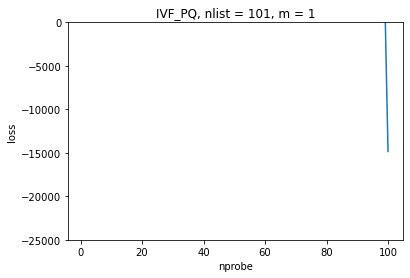

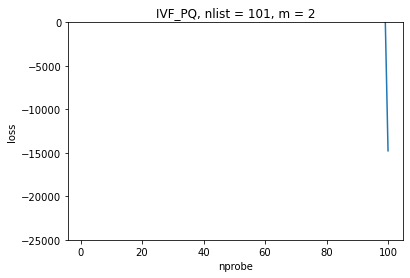

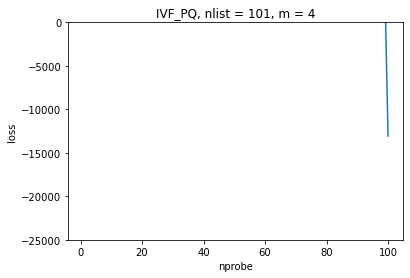

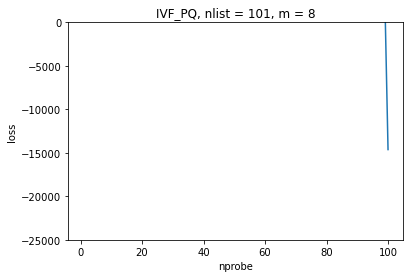

1101
    index_type  nlist  M  nprobe  recall  query_per_sec          loss
132     IVF_PQ   1101  1       1   24.88   22195.607768  6.989804e+06
133     IVF_PQ   1101  1     110  100.00   15159.952290 -1.515495e+04
134     IVF_PQ   1101  1     100  100.00   14863.404089 -1.485840e+04
135     IVF_PQ   1101  2       1   24.88   19187.118024  6.992813e+06
136     IVF_PQ   1101  2     110  100.00   12543.525330 -1.253853e+04
137     IVF_PQ   1101  2     100  100.00   12537.526155 -1.253253e+04
138     IVF_PQ   1101  4       1   24.88   20965.230431  6.991035e+06
139     IVF_PQ   1101  4     110  100.00   14283.344117 -1.427834e+04
140     IVF_PQ   1101  4     100  100.00   14353.240709 -1.434824e+04
141     IVF_PQ   1101  8       1   24.88   21284.400690  6.990716e+06
142     IVF_PQ   1101  8     110  100.00   14671.554498 -1.466655e+04
143     IVF_PQ   1101  8     100  100.00   14467.108168 -1.446211e+04


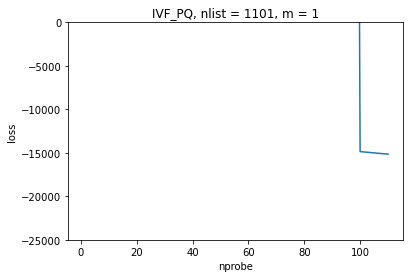

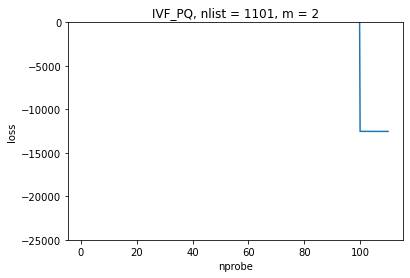

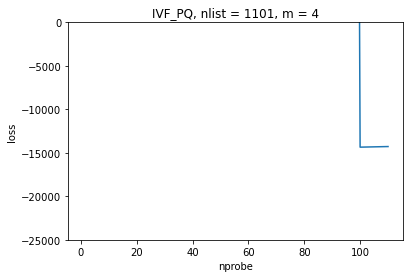

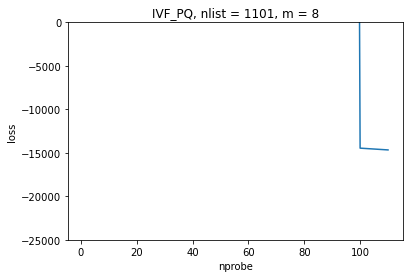

2101
    index_type  nlist  M  nprobe  recall  query_per_sec          loss
252     IVF_PQ   2101  1       1   24.88   20369.598368  6.991630e+06
253     IVF_PQ   2101  1     210  100.00   11479.606974 -1.147461e+04
254     IVF_PQ   2101  1     100  100.00   14512.158328 -1.450716e+04
255     IVF_PQ   2101  2       1   24.88   21653.608673  6.990346e+06
256     IVF_PQ   2101  2     210  100.00   11728.054134 -1.172305e+04
257     IVF_PQ   2101  2     100  100.00   14382.772101 -1.437777e+04
258     IVF_PQ   2101  4       1   24.88   21843.058015  6.990157e+06
259     IVF_PQ   2101  4     210  100.00   10768.154861 -1.076315e+04
260     IVF_PQ   2101  4     100  100.00   14469.104457 -1.446410e+04
261     IVF_PQ   2101  8       1   24.88   21017.759070  6.990982e+06
262     IVF_PQ   2101  8     210  100.00   11735.601567 -1.173060e+04
263     IVF_PQ   2101  8     100  100.00   14534.788786 -1.452979e+04


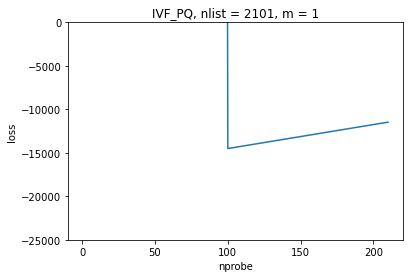

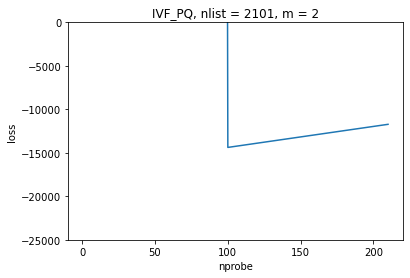

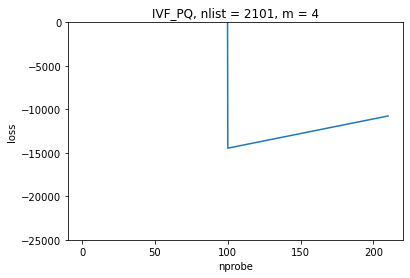

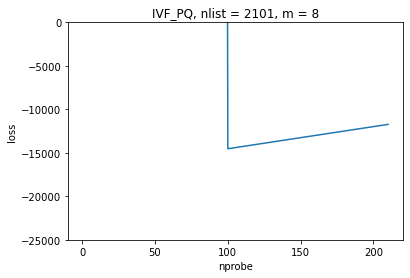

3101
    index_type  nlist  M  nprobe  recall  query_per_sec          loss
372     IVF_PQ   3101  1       1   24.88   20086.700829  6.991913e+06
373     IVF_PQ   3101  1     310  100.00    9911.394678 -9.906395e+03
374     IVF_PQ   3101  1     100  100.00   13786.621964 -1.378162e+04
375     IVF_PQ   3101  2       1   24.88   21744.538338  6.990255e+06
376     IVF_PQ   3101  2     310  100.00    9219.871626 -9.214872e+03
377     IVF_PQ   3101  2     100  100.00   11926.817755 -1.192182e+04
378     IVF_PQ   3101  4       1   24.88   19011.440486  6.992989e+06
379     IVF_PQ   3101  4     310  100.00    8225.093148 -8.220093e+03
380     IVF_PQ   3101  4     100  100.00   13332.604342 -1.332760e+04
381     IVF_PQ   3101  8       1   24.88   21091.742935  6.990908e+06
382     IVF_PQ   3101  8     310  100.00   10480.519740 -1.047552e+04
383     IVF_PQ   3101  8     100  100.00   14398.571919 -1.439357e+04


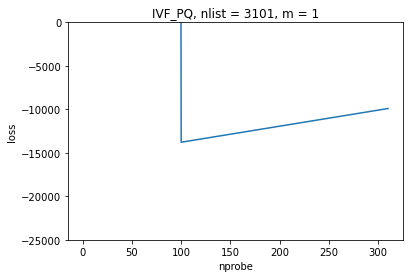

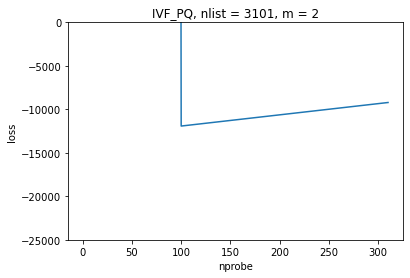

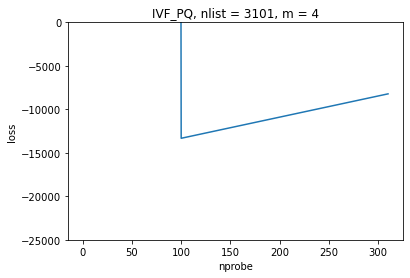

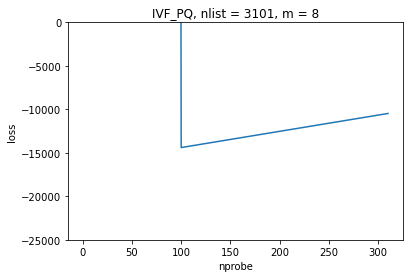

4101
    index_type  nlist  M  nprobe  recall  query_per_sec          loss
492     IVF_PQ   4101  1       1   24.88   18816.132071  6.993184e+06
493     IVF_PQ   4101  1     410  100.00   10394.032662 -1.038903e+04
494     IVF_PQ   4101  1     100  100.00   14442.698254 -1.443770e+04
495     IVF_PQ   4101  2       1   24.88   20203.776493  6.991796e+06
496     IVF_PQ   4101  2     410  100.00    8696.282474 -8.691282e+03
497     IVF_PQ   4101  2     100  100.00   15023.654990 -1.501865e+04
498     IVF_PQ   4101  4       1   24.88   21898.940114  6.990101e+06
499     IVF_PQ   4101  4     410  100.00   10643.010480 -1.063801e+04
500     IVF_PQ   4101  4     100  100.00   14705.504523 -1.470050e+04
501     IVF_PQ   4101  8       1   24.88   20899.417011  6.991101e+06
502     IVF_PQ   4101  8     410  100.00   10497.307038 -1.049231e+04
503     IVF_PQ   4101  8     100  100.00   14493.102972 -1.448810e+04


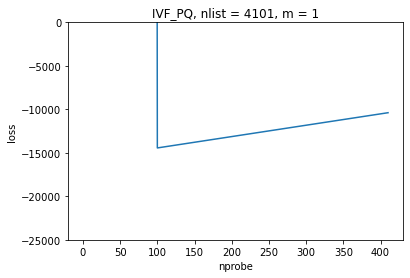

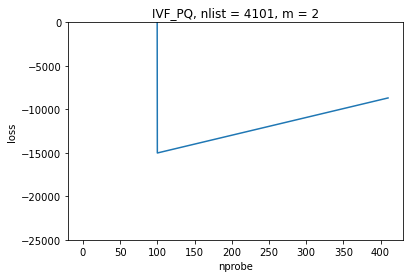

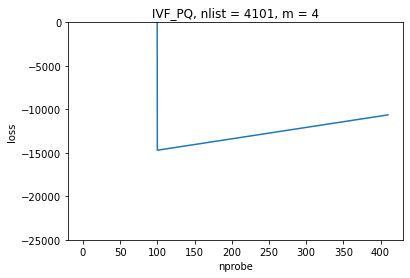

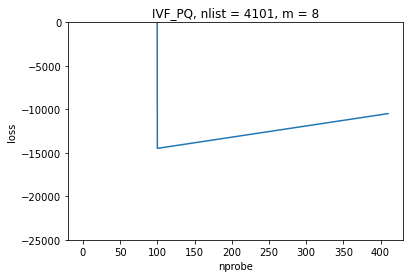

5101
    index_type  nlist  M  nprobe  recall  query_per_sec          loss
612     IVF_PQ   5101  1       1   24.88   22096.217469  6.989904e+06
613     IVF_PQ   5101  1     510  100.00   10465.874838 -1.046087e+04
614     IVF_PQ   5101  1     100  100.00   14529.250381 -1.452425e+04
615     IVF_PQ   5101  2       1   24.88   21375.517277  6.990624e+06
616     IVF_PQ   5101  2     510  100.00    9753.288066 -9.748288e+03
617     IVF_PQ   5101  2     100  100.00   13128.122946 -1.312312e+04
618     IVF_PQ   5101  4       1   24.88   21541.287042  6.990459e+06
619     IVF_PQ   5101  4     510  100.00   10411.577510 -1.040658e+04
620     IVF_PQ   5101  4     100  100.00   14620.922369 -1.461592e+04
621     IVF_PQ   5101  8       1   24.88   22109.029571  6.989891e+06
622     IVF_PQ   5101  8     510  100.00   10513.357564 -1.050836e+04
623     IVF_PQ   5101  8     100  100.00   13747.759677 -1.374276e+04


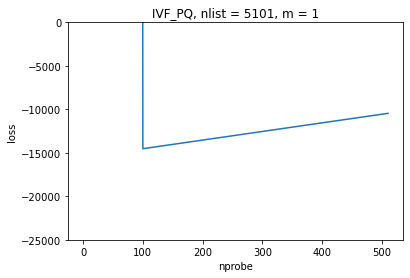

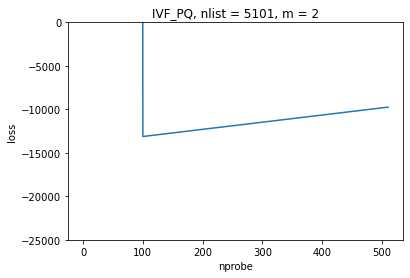

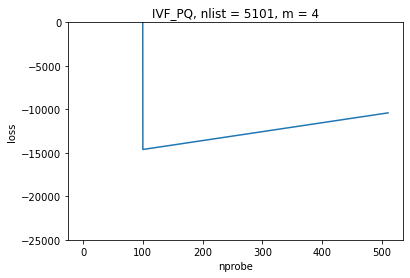

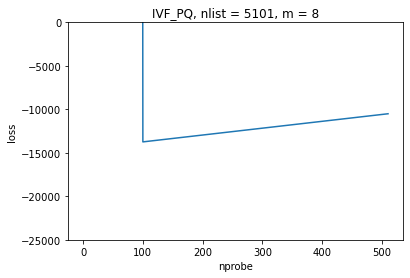

6101
    index_type  nlist  M  nprobe  recall  query_per_sec          loss
732     IVF_PQ   6101  1       1   24.88   21488.313951  6.990512e+06
733     IVF_PQ   6101  1     610  100.00   10234.003514 -1.022900e+04
734     IVF_PQ   6101  1     100  100.00   14864.457596 -1.485946e+04
735     IVF_PQ   6101  2       1   24.88   21555.678898  6.990444e+06
736     IVF_PQ   6101  2     610  100.00   10476.069636 -1.047107e+04
737     IVF_PQ   6101  2     100  100.00   14263.914300 -1.425891e+04
738     IVF_PQ   6101  4       1   24.88   21429.029786  6.990571e+06
739     IVF_PQ   6101  4     610  100.00    9509.168405 -9.504168e+03
740     IVF_PQ   6101  4     100  100.00   12564.191355 -1.255919e+04
741     IVF_PQ   6101  8       1   24.88   20717.727834  6.991282e+06
742     IVF_PQ   6101  8     610  100.00    8426.358084 -8.421358e+03
743     IVF_PQ   6101  8     100  100.00   14345.386141 -1.434039e+04


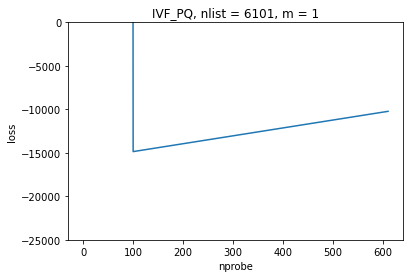

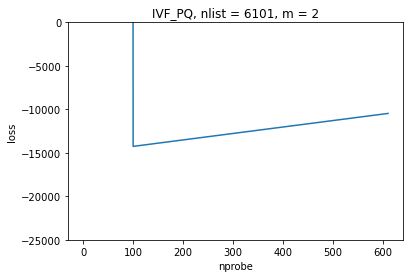

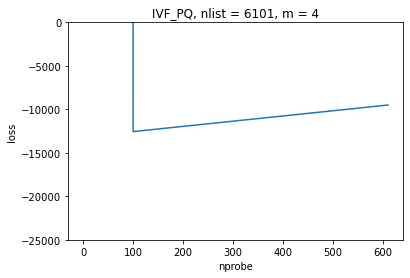

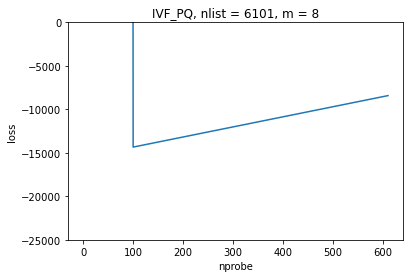

7101
    index_type  nlist  M  nprobe  recall  query_per_sec          loss
852     IVF_PQ   7101  1       1   24.88   20321.240310  6.991679e+06
853     IVF_PQ   7101  1     710  100.00   10374.750173 -1.036975e+04
854     IVF_PQ   7101  1     100  100.00   14436.235974 -1.443124e+04
855     IVF_PQ   7101  2       1   24.88   21804.449990  6.990196e+06
856     IVF_PQ   7101  2     710  100.00   10541.100779 -1.053610e+04
857     IVF_PQ   7101  2     100  100.00   14497.611559 -1.449261e+04
858     IVF_PQ   7101  4       1   24.88   21653.608673  6.990346e+06
859     IVF_PQ   7101  4     710  100.00    9899.697885 -9.894698e+03
860     IVF_PQ   7101  4     100  100.00   12748.644377 -1.274364e+04
861     IVF_PQ   7101  8       1   24.88   20430.121773  6.991570e+06
862     IVF_PQ   7101  8     710  100.00    9723.892985 -9.718893e+03
863     IVF_PQ   7101  8     100  100.00   13303.003584 -1.329800e+04


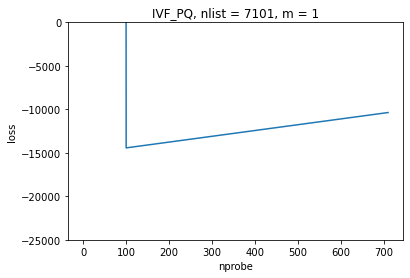

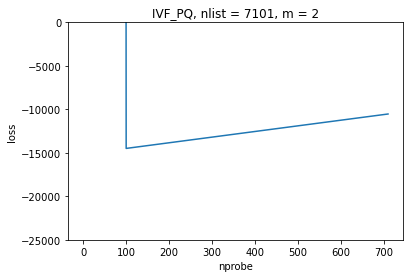

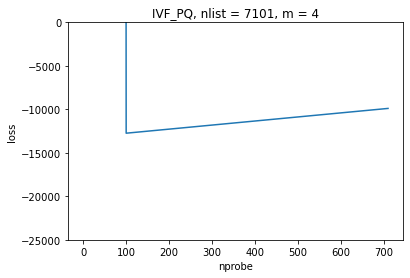

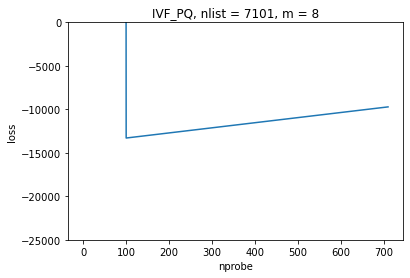

8101
    index_type  nlist  M  nprobe  recall  query_per_sec          loss
972     IVF_PQ   8101  1       1   24.88   20390.393777  6.991610e+06
973     IVF_PQ   8101  1     810  100.00   10742.505891 -1.073751e+04
974     IVF_PQ   8101  1     100  100.00   14600.055695 -1.459506e+04
975     IVF_PQ   8101  2       1   24.88   22010.411419  6.989990e+06
976     IVF_PQ   8101  2     810  100.00   10259.035319 -1.025404e+04
977     IVF_PQ   8101  2     100  100.00   11935.642127 -1.193064e+04
978     IVF_PQ   8101  4       1   24.88   17983.552716  6.994016e+06
979     IVF_PQ   8101  4     810  100.00    8599.290620 -8.594291e+03
980     IVF_PQ   8101  4     100  100.00   14515.171650 -1.451017e+04
981     IVF_PQ   8101  8       1   24.88   22026.593845  6.989973e+06
982     IVF_PQ   8101  8     810  100.00   10653.553467 -1.064855e+04
983     IVF_PQ   8101  8     100  100.00   14425.312973 -1.442031e+04


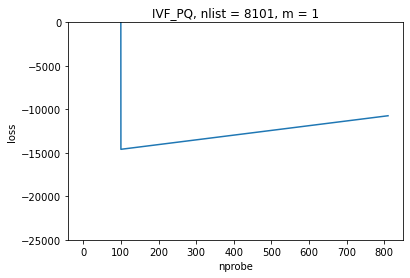

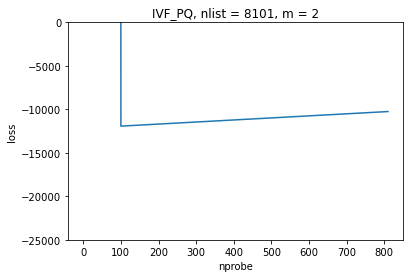

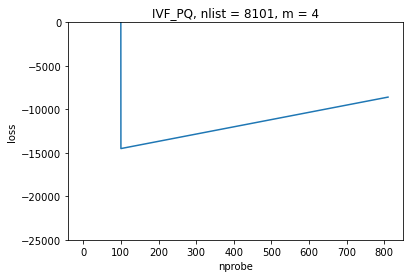

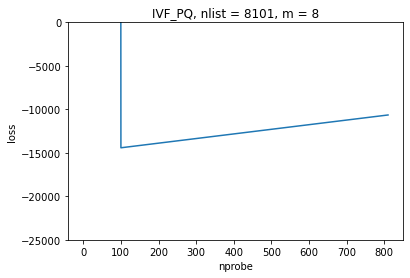

9101
     index_type  nlist  M  nprobe  recall  query_per_sec          loss
1092     IVF_PQ   9101  1       1   24.88   21787.460392  6.990213e+06
1093     IVF_PQ   9101  1     910  100.00   10646.522490 -1.064152e+04
1094     IVF_PQ   9101  1     100  100.00   14523.213296 -1.451821e+04
1095     IVF_PQ   9101  2       1   24.88   22076.446129  6.989924e+06
1096     IVF_PQ   9101  2     910  100.00   10509.669498 -1.050467e+04
1097     IVF_PQ   9101  2     100  100.00   14769.716177 -1.476472e+04
1098     IVF_PQ   9101  4       1   24.88   21422.462843  6.990578e+06
1099     IVF_PQ   9101  4     910  100.00   10667.914643 -1.066291e+04
1100     IVF_PQ   9101  4     100  100.00   15053.310842 -1.504831e+04
1101     IVF_PQ   9101  8       1   24.88   21848.747200  6.990151e+06
1102     IVF_PQ   9101  8     910  100.00   10303.643108 -1.029864e+04
1103     IVF_PQ   9101  8     100  100.00   14830.819278 -1.482582e+04


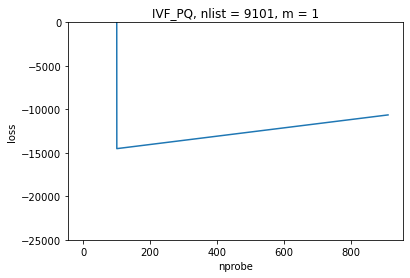

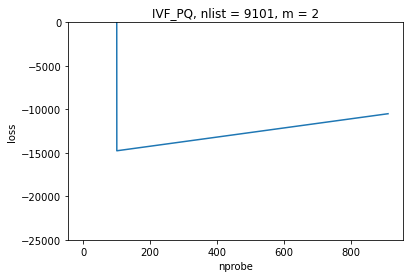

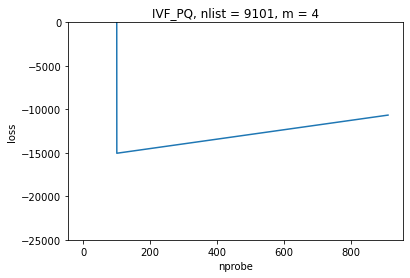

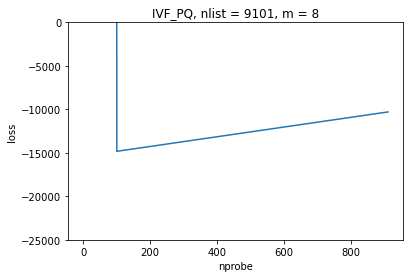

10101
     index_type  nlist  M  nprobe  recall  query_per_sec          loss
1212     IVF_PQ  10101  1       1   24.88   21719.765937  6.990280e+06
1213     IVF_PQ  10101  1    1010  100.00   10506.510358 -1.050151e+04
1214     IVF_PQ  10101  1     100  100.00   14447.175530 -1.444218e+04
1215     IVF_PQ  10101  2       1   24.88   20995.665015  6.991004e+06
1216     IVF_PQ  10101  2    1010  100.00   10387.854472 -1.038285e+04
1217     IVF_PQ  10101  2     100  100.00   14580.768963 -1.457577e+04
1218     IVF_PQ  10101  4       1   24.88   18293.370551  6.993707e+06
1219     IVF_PQ  10101  4    1010  100.00   10424.515969 -1.041952e+04
1220     IVF_PQ  10101  4     100  100.00   14519.191360 -1.451419e+04
1221     IVF_PQ  10101  8       1   24.88   21056.800040  6.990943e+06
1222     IVF_PQ  10101  8    1010  100.00   10228.263467 -1.022326e+04
1223     IVF_PQ  10101  8     100  100.00   14531.767315 -1.452677e+04


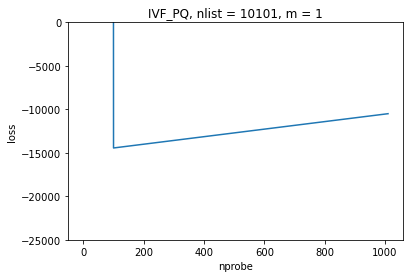

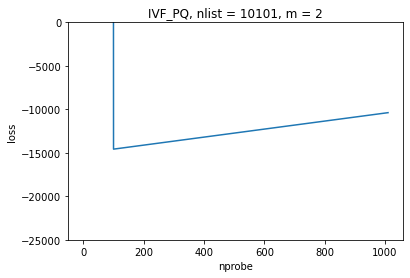

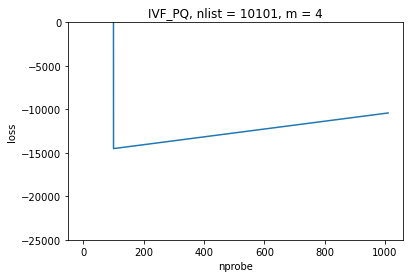

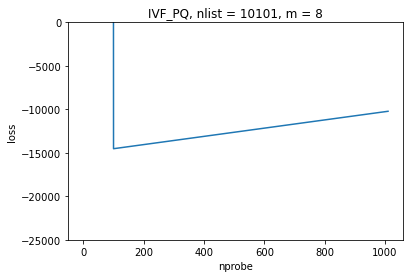

11101
     index_type  nlist  M  nprobe  recall  query_per_sec          loss
1332     IVF_PQ  11101  1       1   24.88   18117.943844  6.993882e+06
1333     IVF_PQ  11101  1    1110  100.00   10619.028812 -1.061403e+04
1334     IVF_PQ  11101  1     100  100.00   13220.816391 -1.321582e+04
1335     IVF_PQ  11101  2       1   24.88   19944.384213  6.992056e+06
1336     IVF_PQ  11101  2    1110  100.00   10415.972981 -1.041097e+04
1337     IVF_PQ  11101  2     100  100.00   14518.688774 -1.451369e+04
1338     IVF_PQ  11101  4       1   24.88   20917.135448  6.991083e+06
1339     IVF_PQ  11101  4    1110  100.00   10477.639829 -1.047264e+04
1340     IVF_PQ  11101  4     100  100.00   13736.053709 -1.373105e+04
1341     IVF_PQ  11101  8       1   24.88   21736.650083  6.990263e+06
1342     IVF_PQ  11101  8    1110  100.00    8974.844867 -8.969845e+03
1343     IVF_PQ  11101  8     100  100.00   12794.533586 -1.278953e+04


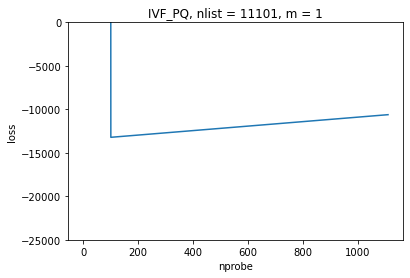

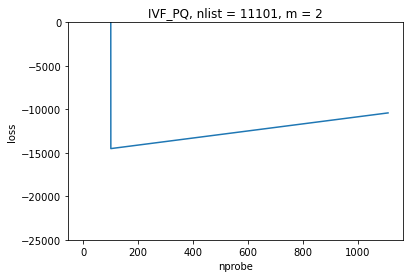

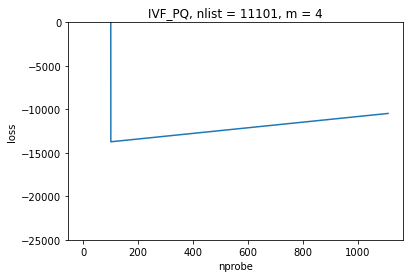

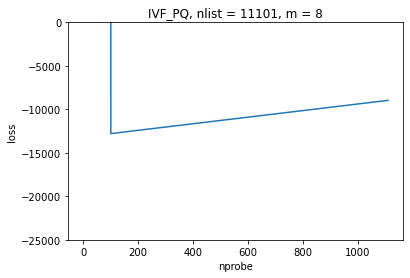

12101
     index_type  nlist  M  nprobe  recall  query_per_sec          loss
1452     IVF_PQ  12101  1       1   24.88   19819.042669  6.992181e+06
1453     IVF_PQ  12101  1    1210  100.00    7156.660467 -7.151660e+03
1454     IVF_PQ  12101  1     100  100.00   12920.658000 -1.291566e+04
1455     IVF_PQ  12101  2       1   24.88   20930.705125  6.991069e+06
1456     IVF_PQ  12101  2    1210  100.00   10386.825487 -1.038183e+04
1457     IVF_PQ  12101  2     100  100.00   13976.820287 -1.397182e+04
1458     IVF_PQ  12101  4       1   24.88   21140.645161  6.990859e+06
1459     IVF_PQ  12101  4    1210  100.00    7718.488802 -7.713489e+03
1460     IVF_PQ  12101  4     100  100.00   12906.345006 -1.290135e+04
1461     IVF_PQ  12101  8       1   24.88   19731.401421  6.992269e+06
1462     IVF_PQ  12101  8    1210  100.00   10562.336943 -1.055734e+04
1463     IVF_PQ  12101  8     100  100.00   14757.763625 -1.475276e+04


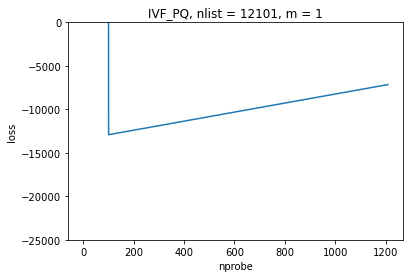

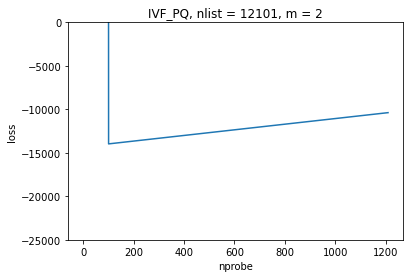

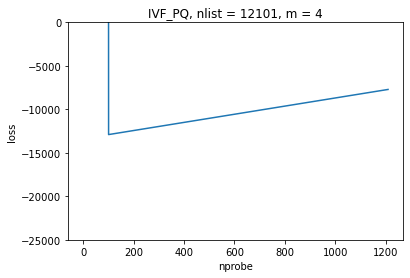

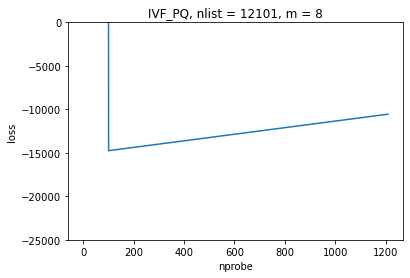

13101
     index_type  nlist  M  nprobe  recall  query_per_sec          loss
1572     IVF_PQ  13101  1       1   24.88   20333.061858  6.991667e+06
1573     IVF_PQ  13101  1    1310  100.00   10238.500220 -1.023350e+04
1574     IVF_PQ  13101  1     100  100.00   13976.820287 -1.397182e+04
1575     IVF_PQ  13101  2       1   24.88   21788.592208  6.990211e+06
1576     IVF_PQ  13101  2    1310  100.00   10373.210664 -1.036821e+04
1577     IVF_PQ  13101  2     100  100.00   14605.139634 -1.460014e+04
1578     IVF_PQ  13101  4       1   24.88   17191.179605  6.994809e+06
1579     IVF_PQ  13101  4    1310  100.00    9021.560699 -9.016561e+03
1580     IVF_PQ  13101  4     100  100.00   12375.863799 -1.237086e+04
1581     IVF_PQ  13101  8       1   24.88   18150.088710  6.993850e+06
1582     IVF_PQ  13101  8    1310  100.00    9824.106432 -9.819106e+03
1583     IVF_PQ  13101  8     100  100.00   14950.290501 -1.494529e+04


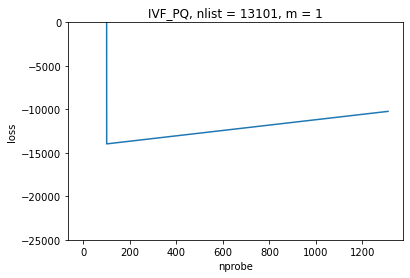

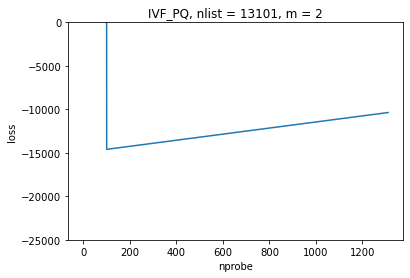

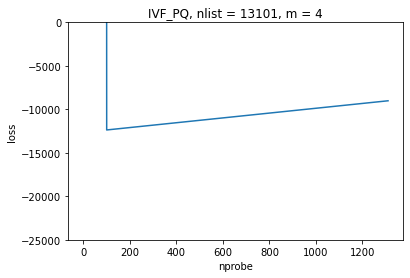

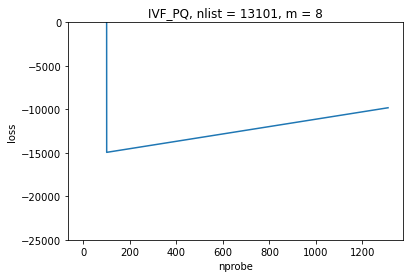

14101
     index_type  nlist  M  nprobe  recall  query_per_sec          loss
1692     IVF_PQ  14101  1       1   24.88   18675.381807  6.993325e+06
1693     IVF_PQ  14101  1    1410  100.00   10593.014269 -1.058801e+04
1694     IVF_PQ  14101  1     100  100.00   14651.054911 -1.464605e+04
1695     IVF_PQ  14101  2       1   24.88   21157.707829  6.990842e+06
1696     IVF_PQ  14101  2    1410  100.00   10562.602936 -1.055760e+04
1697     IVF_PQ  14101  2     100  100.00   13042.801169 -1.303780e+04
1698     IVF_PQ  14101  4       1   24.88   21715.267926  6.990285e+06
1699     IVF_PQ  14101  4    1410  100.00   10520.477576 -1.051548e+04
1700     IVF_PQ  14101  4     100  100.00   14894.016548 -1.488902e+04
1701     IVF_PQ  14101  8       1   24.88   18791.684588  6.993208e+06
1702     IVF_PQ  14101  8    1410  100.00    8567.847367 -8.562847e+03
1703     IVF_PQ  14101  8     100  100.00   14735.987071 -1.473099e+04


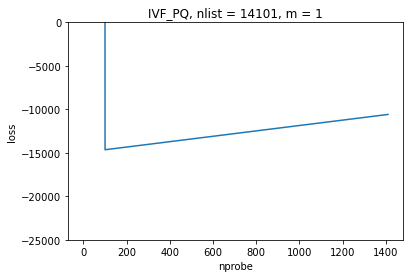

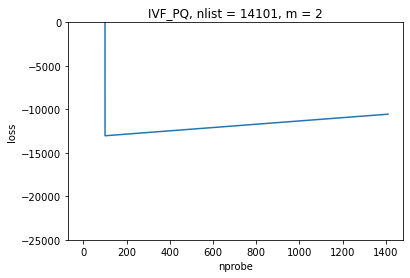

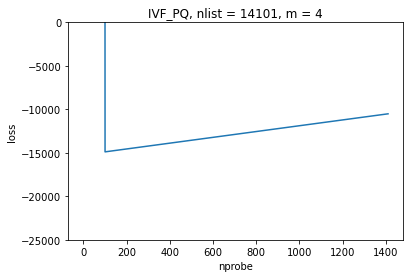

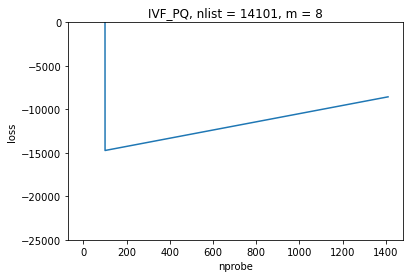

15101
     index_type  nlist  M  nprobe  recall  query_per_sec          loss
1812     IVF_PQ  15101  1       1   24.88   21920.685690  6.990079e+06
1813     IVF_PQ  15101  1    1510  100.00   10507.826436 -1.050283e+04
1814     IVF_PQ  15101  1     100  100.00   14685.938375 -1.468094e+04
1815     IVF_PQ  15101  2       1   24.88   21159.842599  6.990840e+06
1816     IVF_PQ  15101  2    1510  100.00   10461.959043 -1.045696e+04
1817     IVF_PQ  15101  2     100  100.00   14757.244388 -1.475224e+04
1818     IVF_PQ  15101  4       1   24.88   21258.509883  6.990741e+06
1819     IVF_PQ  15101  4    1510  100.00   10542.160559 -1.053716e+04
1820     IVF_PQ  15101  4     100  100.00   14909.900110 -1.490490e+04
1821     IVF_PQ  15101  8       1   24.88   21551.248587  6.990449e+06
1822     IVF_PQ  15101  8    1510  100.00   10418.560286 -1.041356e+04
1823     IVF_PQ  15101  8     100  100.00   14736.504813 -1.473150e+04


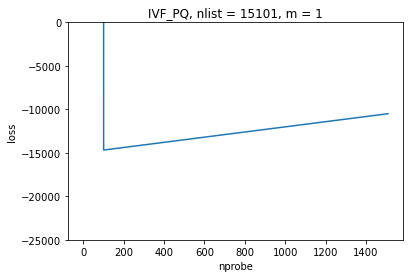

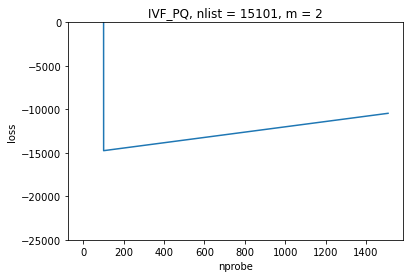

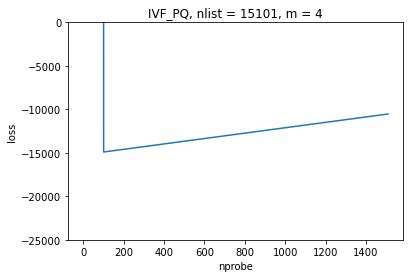

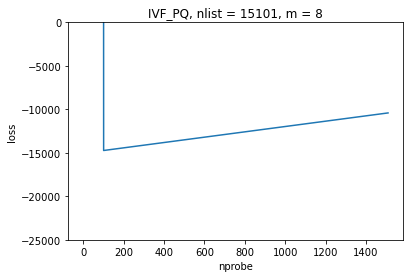

16101
     index_type  nlist  M  nprobe  recall  query_per_sec          loss
1932     IVF_PQ  16101  1       1   24.88   21510.354377  6.990490e+06
1933     IVF_PQ  16101  1    1610  100.00   10515.202567 -1.051020e+04
1934     IVF_PQ  16101  1     100  100.00   14076.735132 -1.407174e+04
1935     IVF_PQ  16101  2       1   24.88   20270.172047  6.991730e+06
1936     IVF_PQ  16101  2    1610  100.00   10452.833574 -1.044783e+04
1937     IVF_PQ  16101  2     100  100.00   14716.339778 -1.471134e+04
1938     IVF_PQ  16101  4       1   24.88   21290.883249  6.990709e+06
1939     IVF_PQ  16101  4    1610  100.00   10351.705415 -1.034671e+04
1940     IVF_PQ  16101  4     100  100.00   14405.990039 -1.440099e+04
1941     IVF_PQ  16101  8       1   24.88   20751.553533  6.991248e+06
1942     IVF_PQ  16101  8    1610  100.00    9141.302879 -9.136303e+03
1943     IVF_PQ  16101  8     100  100.00   12419.839507 -1.241484e+04


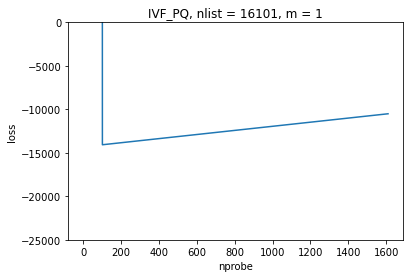

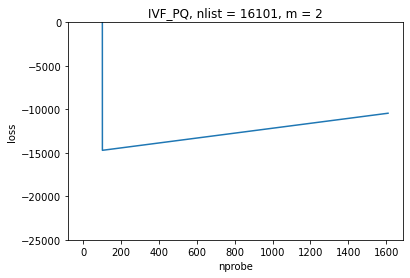

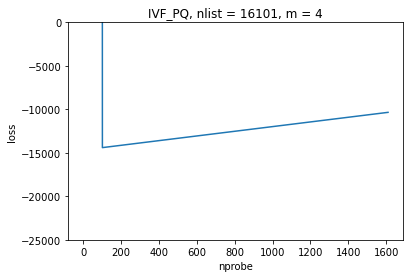

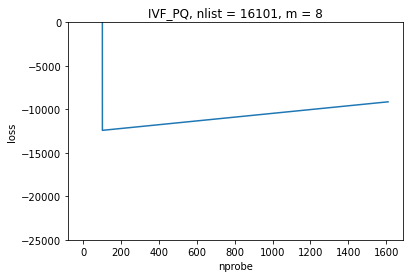

In [85]:
for i in range(101,16301,1000):
    print(i)
    sub = df[df["nlist"] == i]
    print(sub)
    m_set = sorted(list(set(sub['M'])))
    for m in m_set:
#         print(m_set)
        sub_sub = sub[sub["M"] == m].sort_values('nprobe')
#         print(sub_sub)

        x = sub_sub["nprobe"]
        y = sub_sub["loss"]
        plt.xlabel('nprobe')
        plt.ylabel('loss')
        title = index_type+', nlist = '+ str(i) + ", m = "+str(m)
        plt.title(title)


        plt.ylim(-25000, 0)
        plt.savefig("./figures/"+title)
        plt.plot(x,y)
        plt.show()
    
    
    

## HNSW

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

In [94]:
index_type = "HNSW"

In [95]:
file_name = "./grid_search_results/"+index_type+".csv"

In [96]:
df = pd.read_csv(file_name)

In [97]:
df = df.drop(columns = ["Unnamed: 0"])

In [98]:
df

,index_type,M,efConstruction,ef,recall,query_per_sec,loss
0,HNSW,4,8,100,61.10,10953.759369,3.379046e+06
1,HNSW,4,8,200,73.43,18579.419712,2.138421e+06
2,HNSW,4,8,300,78.42,18031.486179,1.639969e+06
3,HNSW,4,8,400,84.64,16695.740785,1.019304e+06
4,HNSW,4,8,500,88.31,15573.681865,6.534263e+05
...,...,...,...,...,...,...,...
9995,HNSW,24,408,18600,100.00,2411.351041,-2.406351e+03
9996,HNSW,24,408,18700,100.00,2428.763181,-2.423763e+03
9997,HNSW,24,408,18800,100.00,2115.375964,-2.110376e+03
9998,HNSW,24,408,18900,100.00,2041.232437,-2.036232e+03


[4, 14, 24]

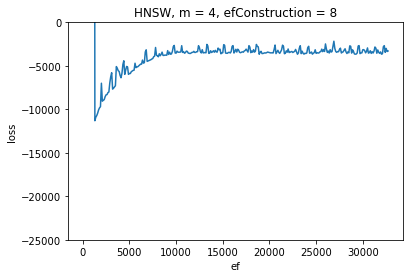

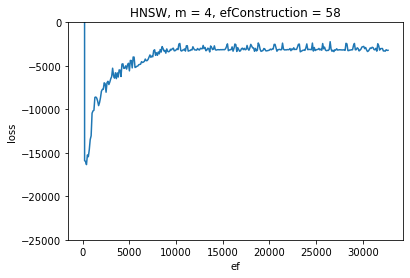

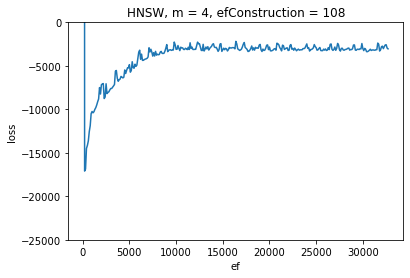

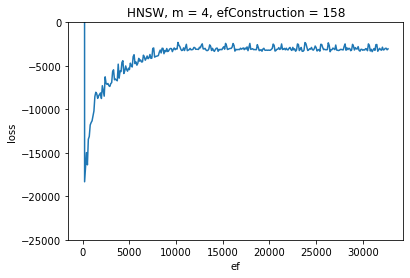

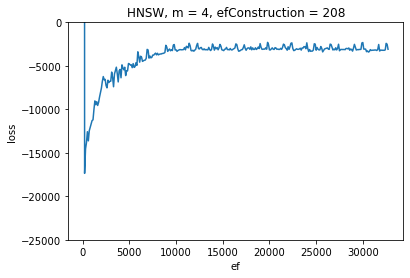

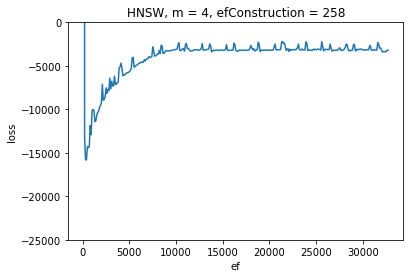

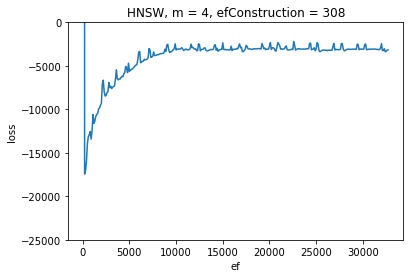

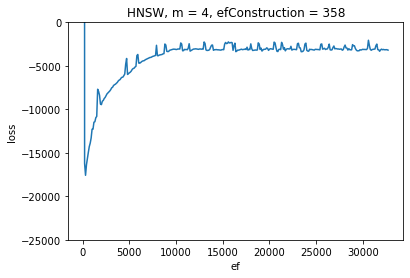

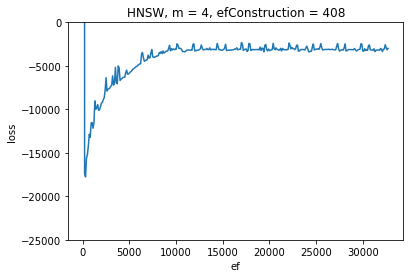

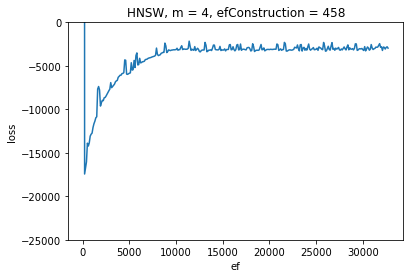

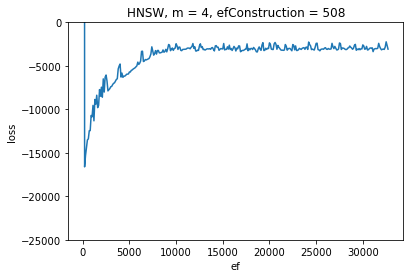

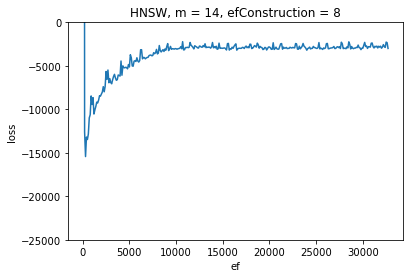

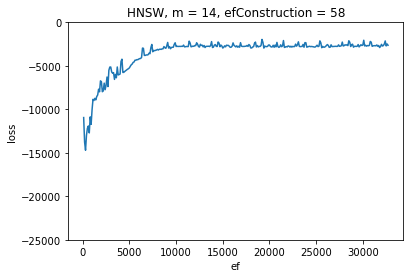

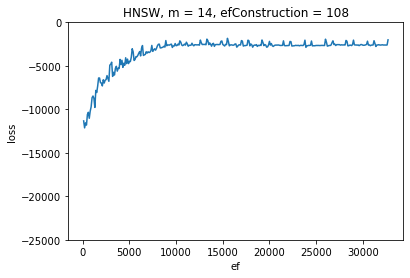

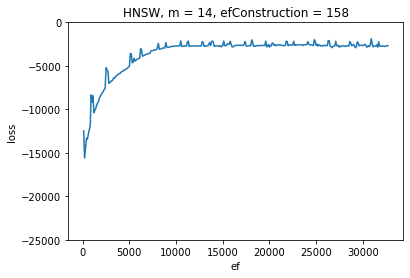

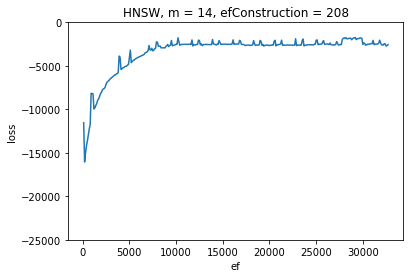

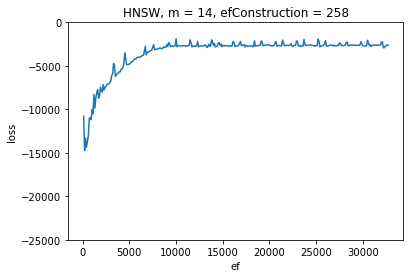

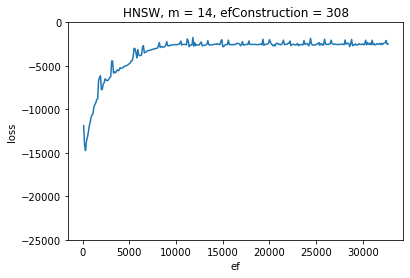

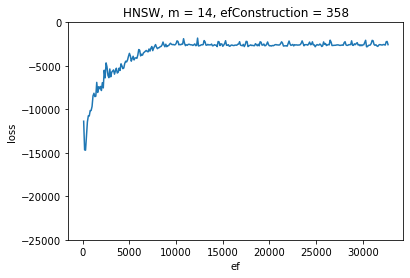

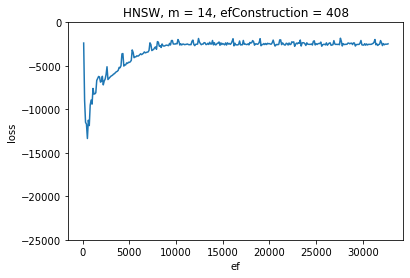

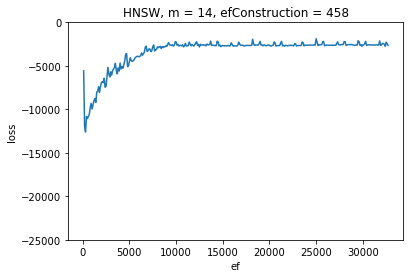

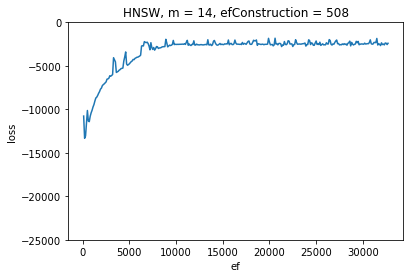

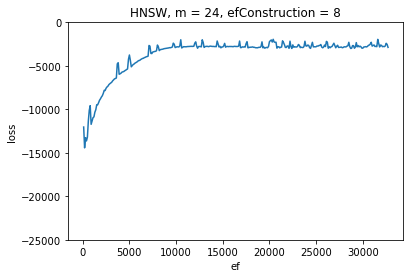

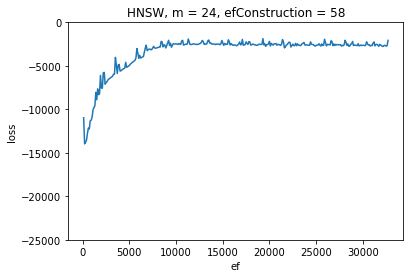

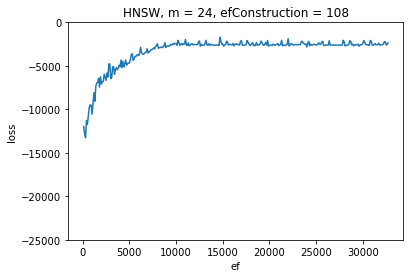

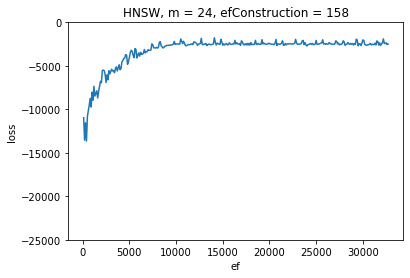

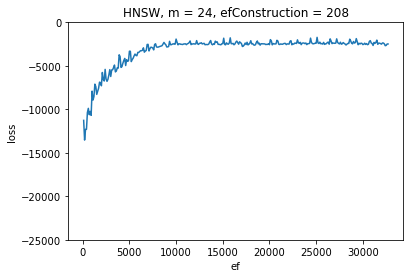

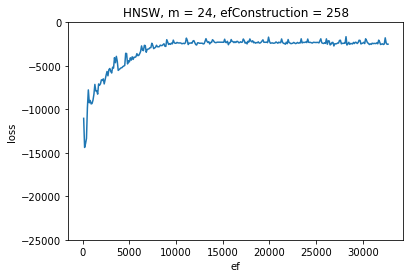

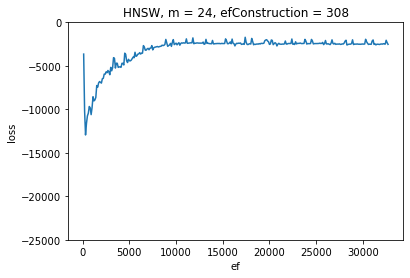

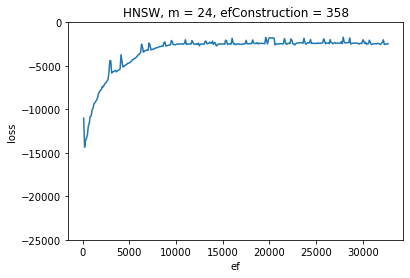

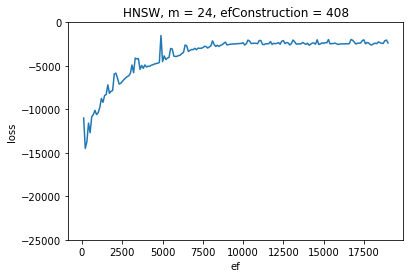

In [106]:
m_set = sorted(list(set(df['M'])))

for m in m_set:
    sub = df[df["M"] == m]
    efConstruction_set = sorted(list(set(sub['efConstruction'])))
    for efConstruction in efConstruction_set:
#         print(m_set)
        sub_sub = sub[sub["efConstruction"] == efConstruction].sort_values('ef')
#         print(sub_sub)

        x = sub_sub["ef"]
        y = sub_sub["loss"]
        plt.xlabel('ef')
        plt.ylabel('loss')
        title = index_type+', m = '+ str(m) + ", efConstruction = "+str(efConstruction)
        plt.title(title)


        plt.ylim(-25000, 0)
        
        plt.plot(x,y)
        plt.savefig("./figures/"+title)
        plt.show()
    
    
    